# House Price Project

## 1 Exploratory Data Analysis

### 1.1 Imports

In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# import pickle
import pickle

# import zscore
from scipy.stats import zscore

### 1.2 Data Overview

In [585]:
# Reading the dataset
df = pd.read_csv('data/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [586]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [587]:
# identify the data types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [588]:
# Display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## 2 Missing Data

### 2.1 Finding Missing Values

In [589]:
# drop the columns with missing values more than 50%
df = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1)

In [590]:
# Display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

### 2.2 Handling missing data

In [591]:
# display the catergorical columns with missing values
df.select_dtypes('object').isna().sum()[df.select_dtypes('object').isna().sum() > 0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [592]:
cols = ['Electrical', 'BsmtExposure', 'BsmtFinType2', 'GarageFinish', 'GarageQual', 
        'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'GarageType']

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0]) # fill the missing values with the mode

In [593]:
# Display the missing values in the numerical columns
df.select_dtypes(['int64', 'float64']).isna().sum()[df.select_dtypes(['int64', 'float64']).isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [594]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define the columns to be imputed
num_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Initialize the IterativeImputer
imputer = IterativeImputer()

# Perform the imputation on the selected columns
df[num_cols] = imputer.fit_transform(df[num_cols])

In [595]:
# show the dtypes of the columns with missing values
df[df.columns[df.isnull().sum() > 0]].dtypes # no more missing values

Series([], dtype: object)

In [596]:
# drop the column CentralAir
df = df.drop(['CentralAir'], axis=1)

In [597]:
# identify all missing values
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

## 3 Handling Outliers

Id                  Axes(0.125,0.814746;0.133621x0.0652542)
MSSubClass       Axes(0.285345,0.814746;0.133621x0.0652542)
LotFrontage       Axes(0.44569,0.814746;0.133621x0.0652542)
LotArea          Axes(0.606034,0.814746;0.133621x0.0652542)
OverallQual      Axes(0.766379,0.814746;0.133621x0.0652542)
OverallCond         Axes(0.125,0.736441;0.133621x0.0652542)
YearBuilt        Axes(0.285345,0.736441;0.133621x0.0652542)
YearRemodAdd      Axes(0.44569,0.736441;0.133621x0.0652542)
MasVnrArea       Axes(0.606034,0.736441;0.133621x0.0652542)
BsmtFinSF1       Axes(0.766379,0.736441;0.133621x0.0652542)
BsmtFinSF2          Axes(0.125,0.658136;0.133621x0.0652542)
BsmtUnfSF        Axes(0.285345,0.658136;0.133621x0.0652542)
TotalBsmtSF       Axes(0.44569,0.658136;0.133621x0.0652542)
1stFlrSF         Axes(0.606034,0.658136;0.133621x0.0652542)
2ndFlrSF         Axes(0.766379,0.658136;0.133621x0.0652542)
LowQualFinSF        Axes(0.125,0.579831;0.133621x0.0652542)
GrLivArea        Axes(0.285345,0.579831;

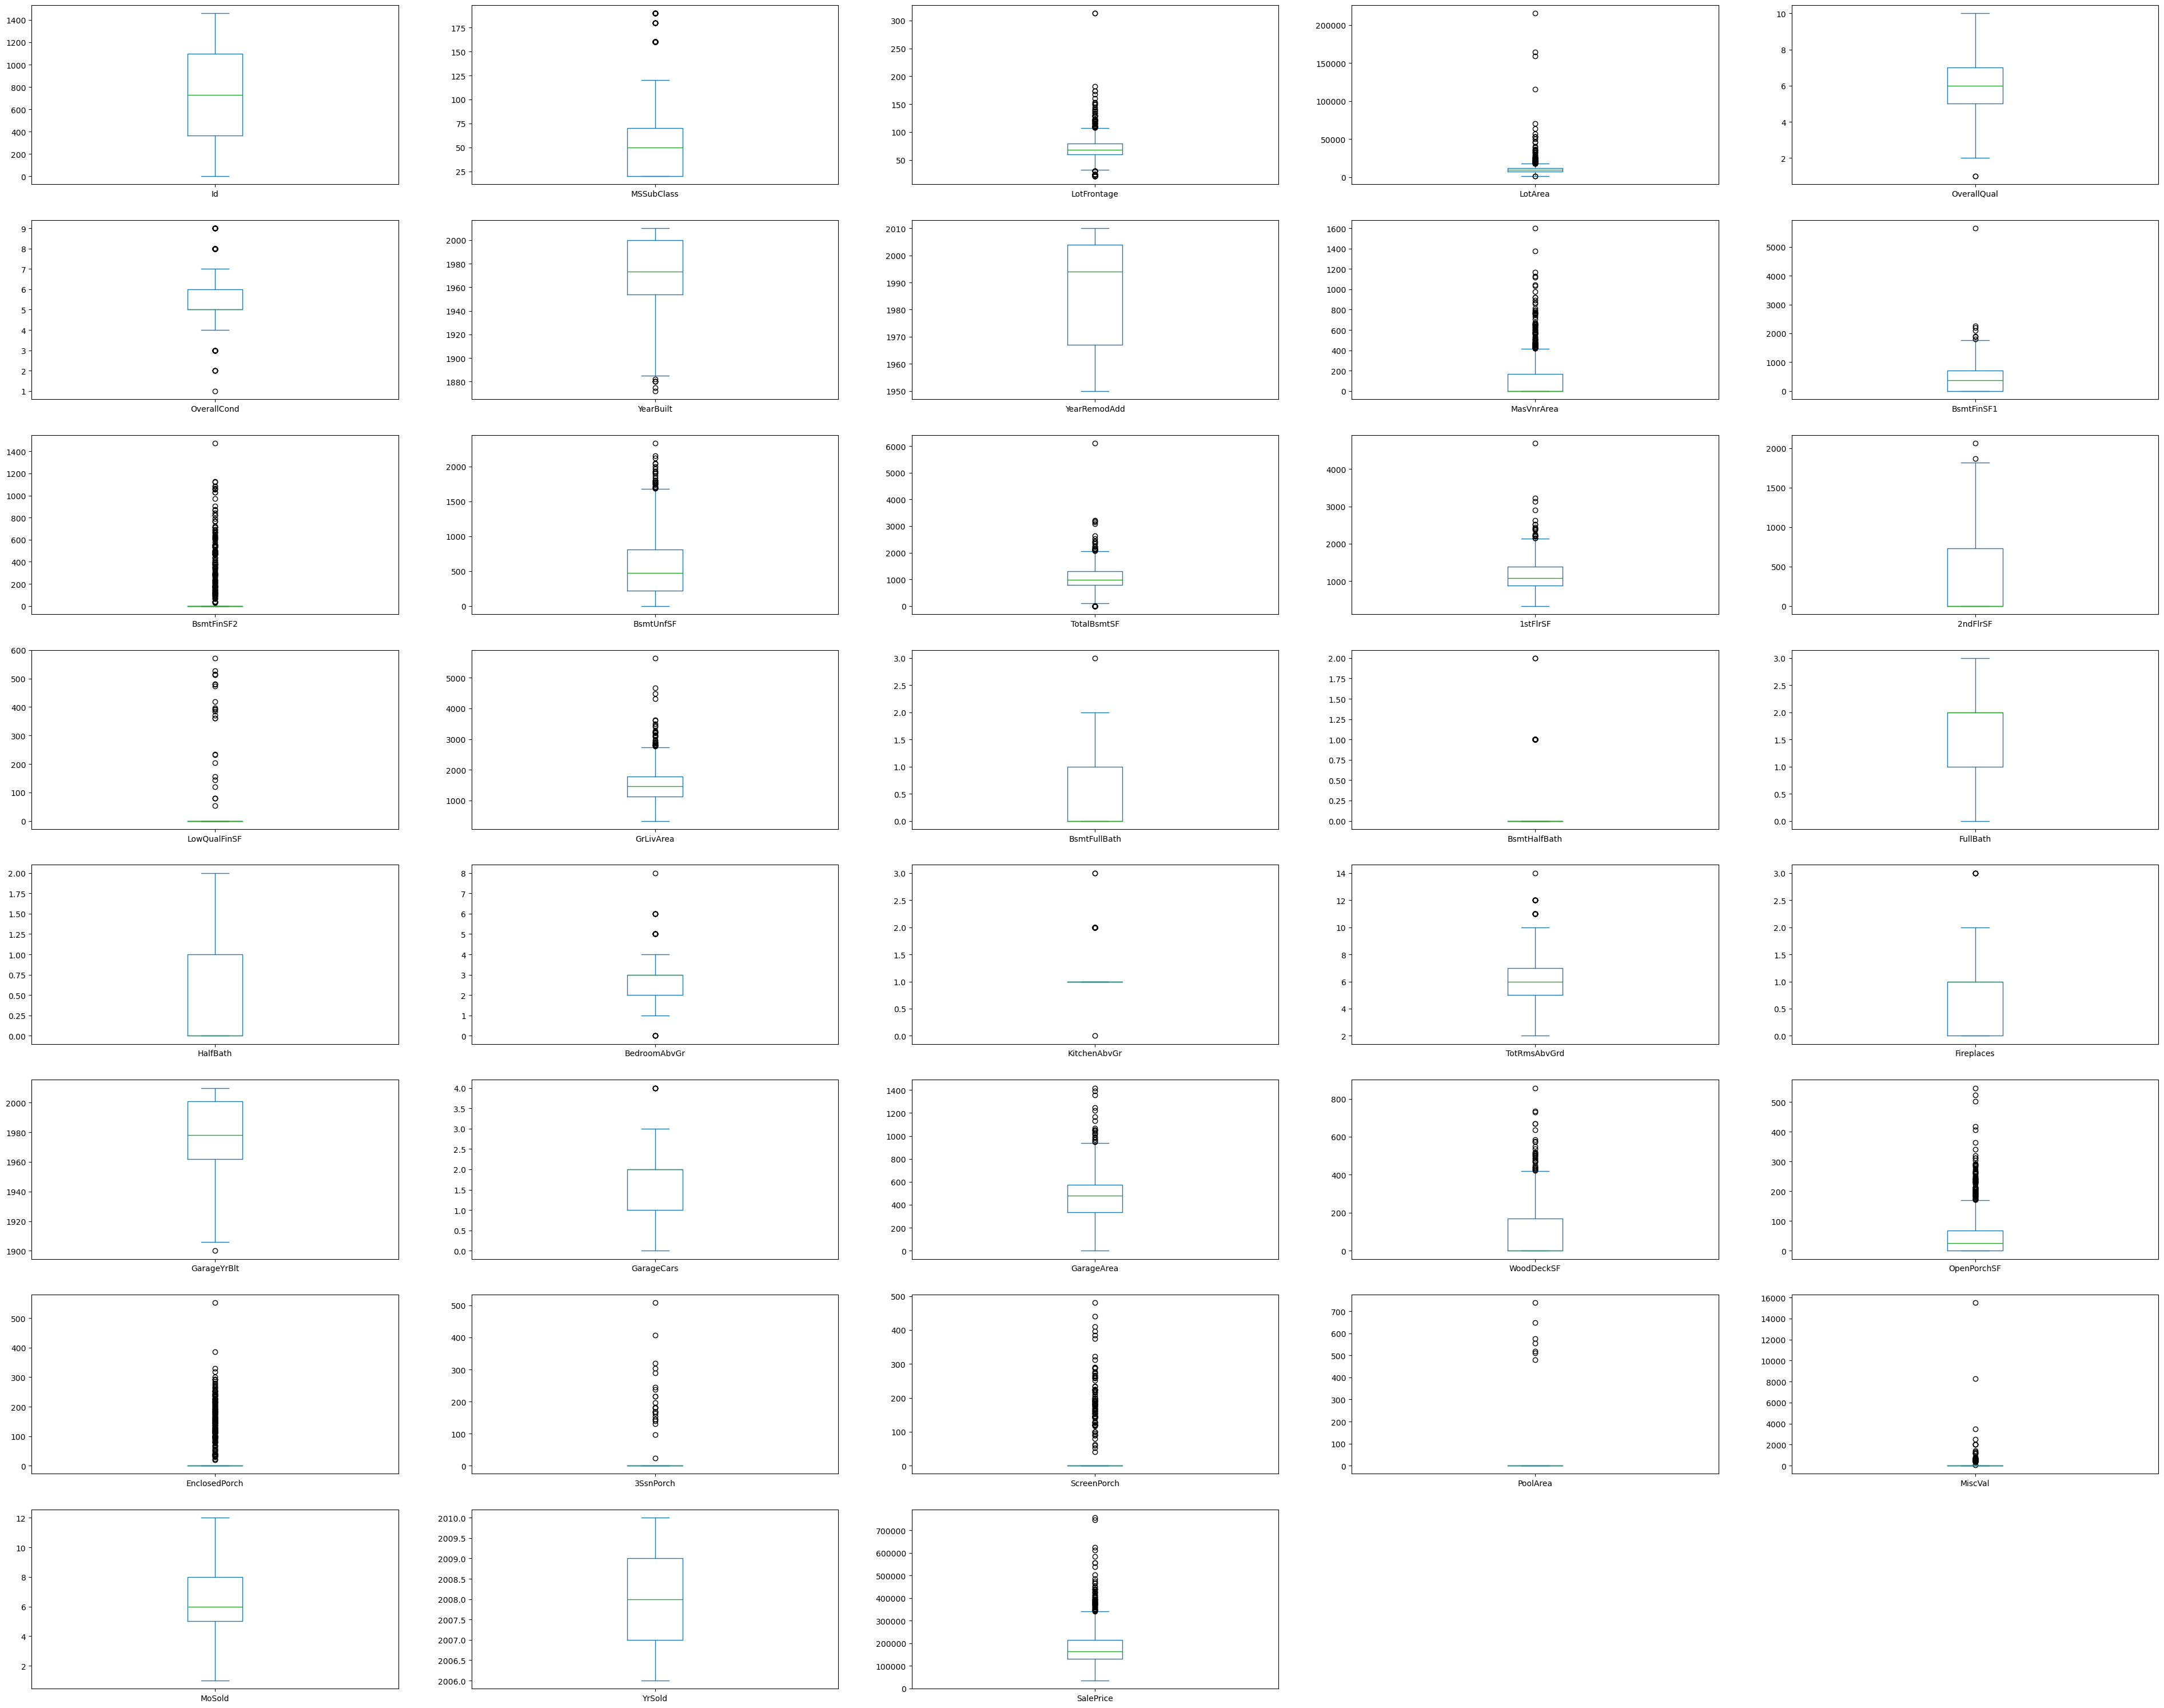

In [598]:
# box plot
df.plot(kind='box', subplots=True, layout=(10,5), sharex=False, sharey=False, figsize=(48,48))

### 3.1 LotFrontage

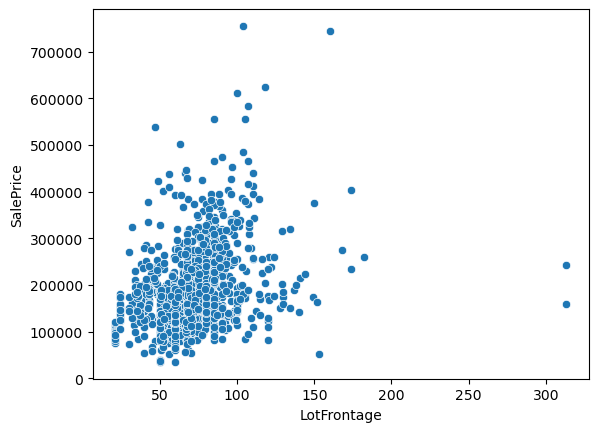

In [599]:
# draw a scatter plot for LotFrontage and SalePrice
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df)
plt.show()

In [600]:
df.query('LotFrontage > 300')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
934    935          20       RL        313.0    27650   Pave      IR2   
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
934          HLS    AllPub    Inside  ...             0         0           0   
1298         Bnk    AllPub    Corner  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
934         0       0     11    2008        WD         Normal     242000  
1298      480       0      1    2008       New        Partial     160000  

[2 rows x 74 columns]

In [601]:
# drop the row with LotFrontage value over 300
df.drop(df[df['LotFrontage'] > 300].index, inplace = True)

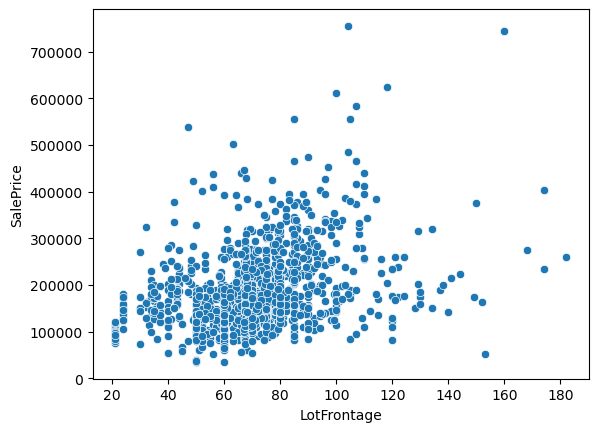

In [602]:
# draw a scatter plot for LotFrontage and SalePrice
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df)
plt.show()

### 3.2 LotArea

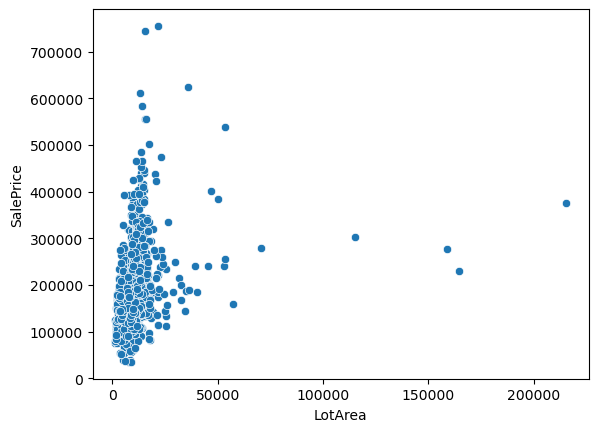

In [603]:
# scatter plot of LotArea and SalePrice
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.show()

In [604]:
# drop the row with LotArea value over 100000
df.drop(df[df['LotArea'] > 100000].index, inplace = True)

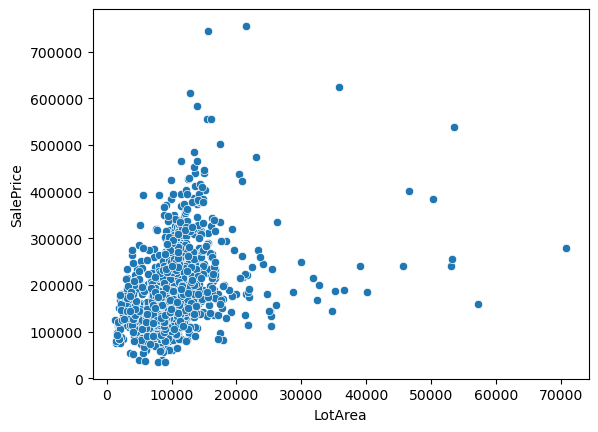

In [605]:
# scatter plot of LotArea and SalePrice
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.show()

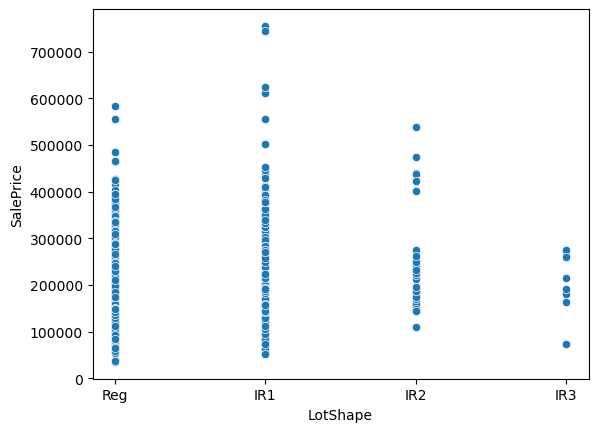

In [606]:
# draw a scatter plot of LotShape and SalePrice
sns.scatterplot(x='LotShape', y='SalePrice', data=df)
plt.show()

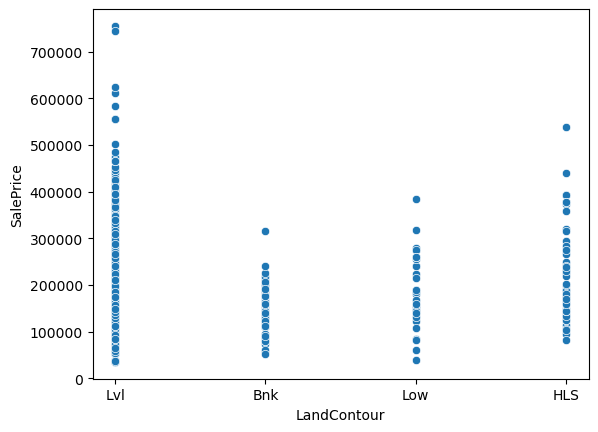

In [607]:
# draw a scatter plot of LandContour and SalePrice
sns.scatterplot(x='LandContour', y='SalePrice', data=df)
plt.show()

### 3.3 Utilities

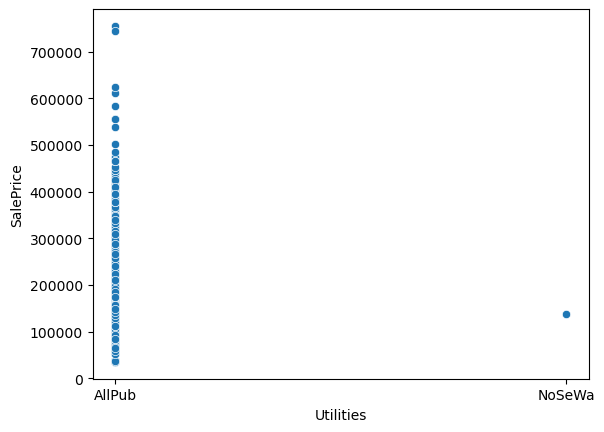

In [608]:
# draw a scatter plot of Utilities and SalePrice
sns.scatterplot(x='Utilities', y='SalePrice', data=df)
plt.show()

In [609]:
# state the query of utilities column
df.query('Utilities == "NoSeWa"')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
944  945          20       RL    80.635934    14375   Pave      IR1   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
944         Lvl    NoSeWa   CulDSac  ...             0         0         233   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
944        0       0      1    2009       COD        Abnorml     137500  

[1 rows x 74 columns]

In [610]:
# drop the row with Utilities value NoSeWa
df.drop(df[df['Utilities'] == 'NoSeWa'].index, inplace = True)

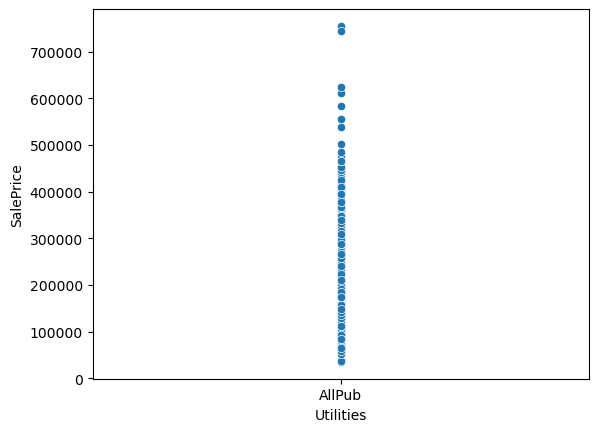

In [611]:
# draw a scatter plot of Utilities and SalePrice
sns.scatterplot(x='Utilities', y='SalePrice', data=df)
plt.show()

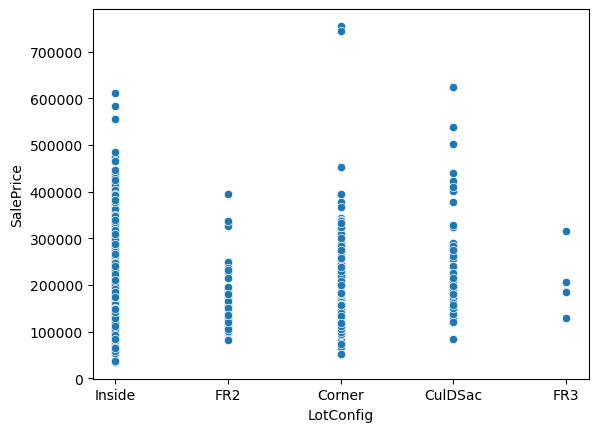

In [612]:
# draw a scatter plot of LotConfig and SalePrice
sns.scatterplot(x='LotConfig', y='SalePrice', data=df)
plt.show()

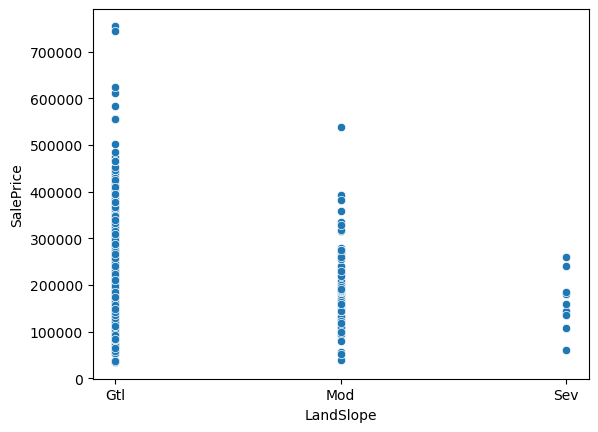

In [613]:
# draw a scatter plot of LandSlope and SalePrice
sns.scatterplot(x='LandSlope', y='SalePrice', data=df)
plt.show()

### 3.4 Neighborhood

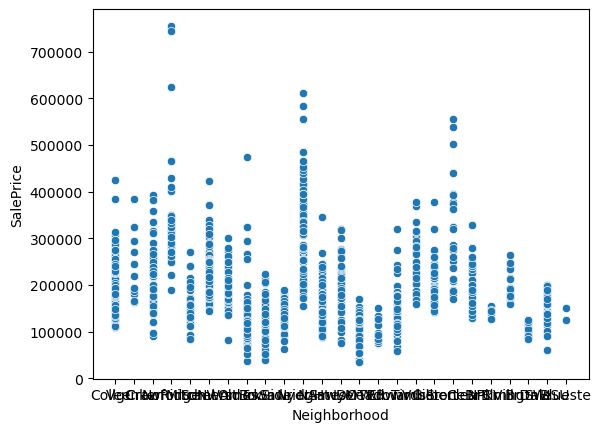

In [614]:
# draw a scatter plot of Neighborhood and SalePrice so that we can see the relationship
sns.scatterplot(x='Neighborhood', y='SalePrice', data=df)
plt.show()

In [615]:
# show the values and features in Neighborhood
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [616]:
# count the datapoint in Neighborhood
df['Neighborhood'].value_counts()

Neighborhood
NAmes      224
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      35
ClearCr     26
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [617]:
# drop the row in Neighborhood called Blueste
df.drop(df[df['Neighborhood'] == 'Blueste'].index, inplace = True)

In [618]:
# count the datapoint in Neighborhood
df['Neighborhood'].value_counts()

Neighborhood
NAmes      224
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      35
ClearCr     26
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Name: count, dtype: int64

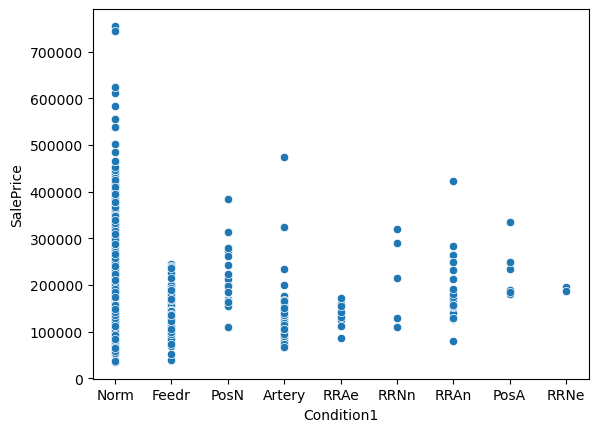

In [619]:
# draw a scatter plot of Condition1 and SalePrice
sns.scatterplot(x='Condition1', y='SalePrice', data=df)
plt.show()

### 3.5 Condition2

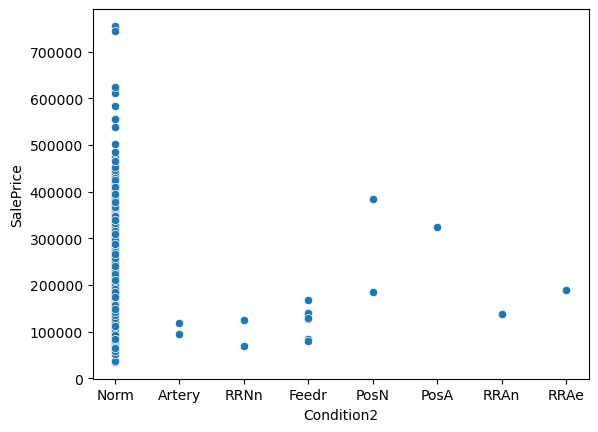

In [620]:
# draw a scatter plot of Condition2 and SalePrice
sns.scatterplot(x='Condition2', y='SalePrice', data=df)
plt.show()

In [621]:
# drop the row in Condtional2 called PosA, RRAn and RRAe
df.drop(df[df['Condition2'] == 'PosA'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAn'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAe'].index, inplace = True)

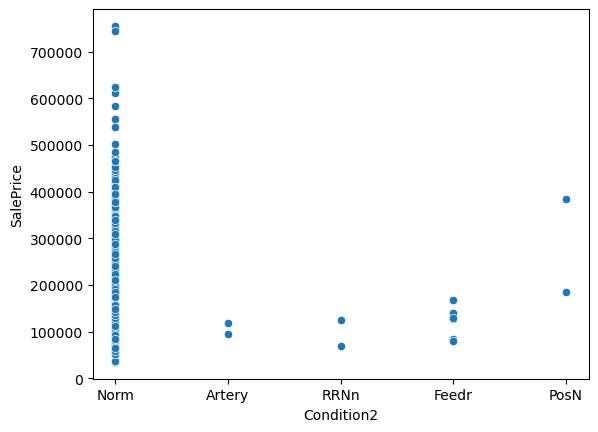

In [622]:
# draw a scatter plot of Condition2 and SalePrice
sns.scatterplot(x='Condition2', y='SalePrice', data=df)
plt.show()

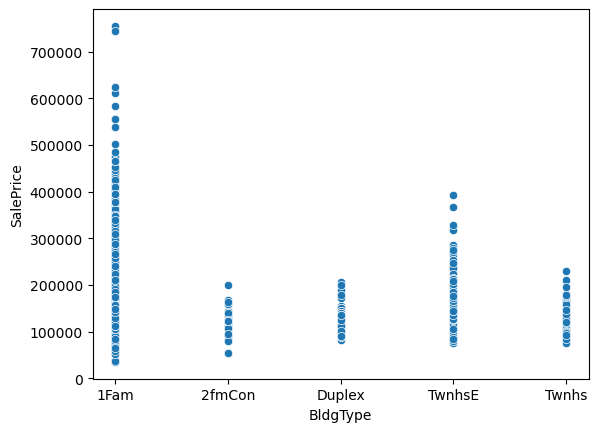

In [623]:
# draw a scatter plot of BldgType and SalePrice
sns.scatterplot(x='BldgType', y='SalePrice', data=df)
plt.show()

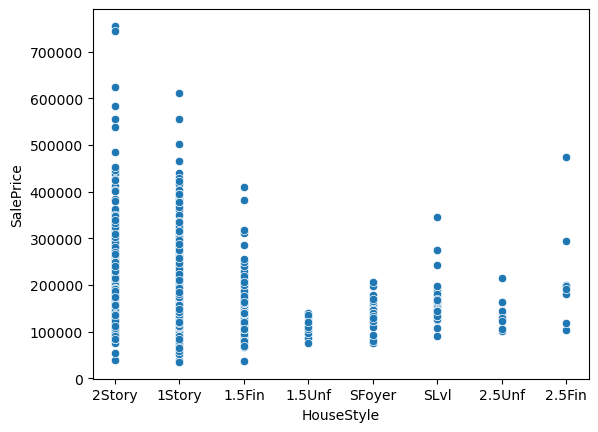

In [624]:
# draw a scatter plot of HouseStyle and SalePrice
sns.scatterplot(x='HouseStyle', y='SalePrice', data=df)
plt.show()

### 3.6 OverallQual

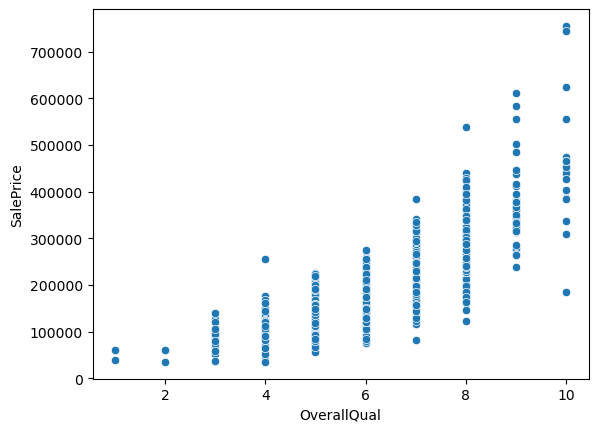

In [625]:
# draw a scatter plot of OverallQual and SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

In [626]:
# drop the row with OverallQual value 1 and 2
df.drop(df[df['OverallQual'] == 1].index, inplace = True)
df.drop(df[df['OverallQual'] == 2].index, inplace = True)

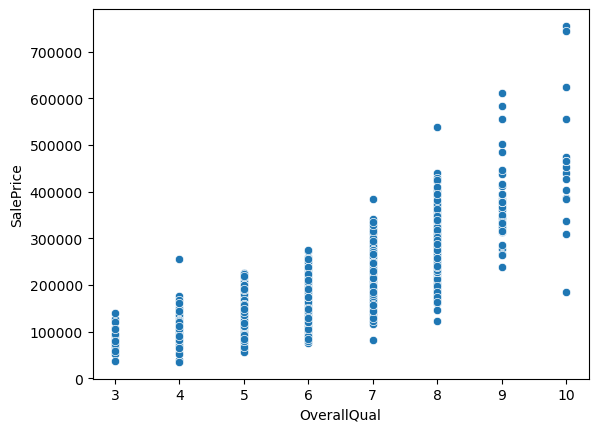

In [627]:
# draw a scatter plot of OverallQual and SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

### 3.7 OverallCond

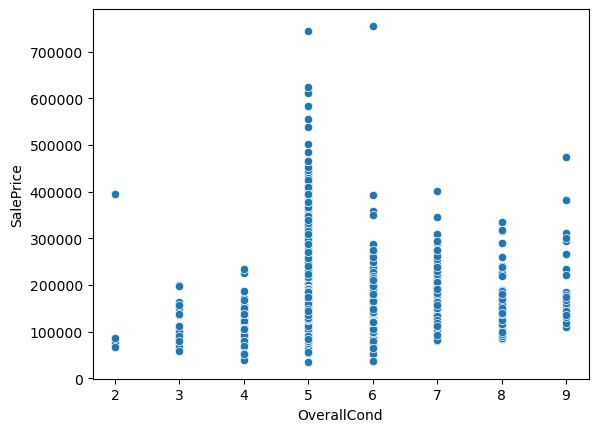

In [628]:
# draw a scatter plot of OverallCond and SalePrice
sns.scatterplot(x='OverallCond', y='SalePrice', data=df)
plt.show()

In [629]:
# drop the row with OverallCond value 2
df.drop(df[df['OverallCond'] == 2].index, inplace = True)

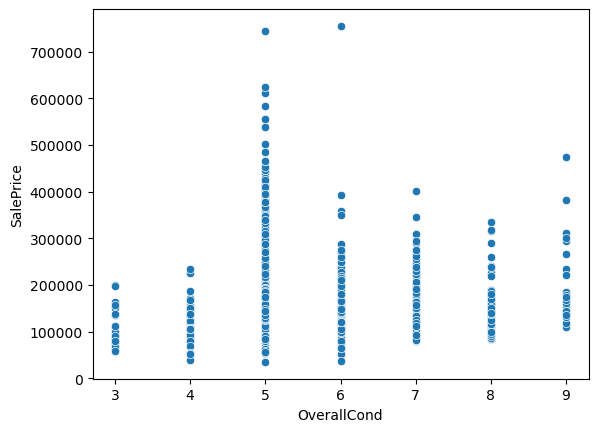

In [630]:
# draw a scatter plot of OverallCond and SalePrice
sns.scatterplot(x='OverallCond', y='SalePrice', data=df)
plt.show()

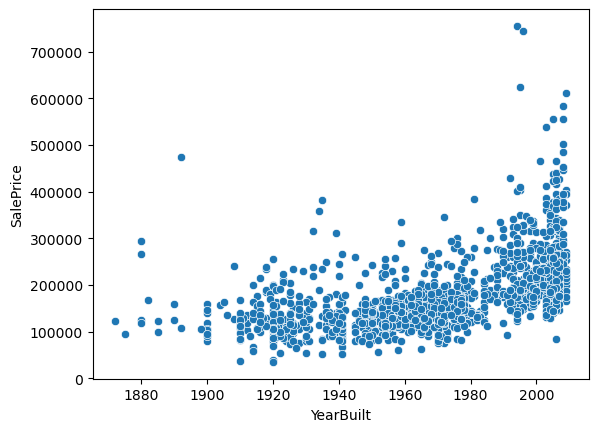

In [631]:
# scatter plot of YearBuilt and SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

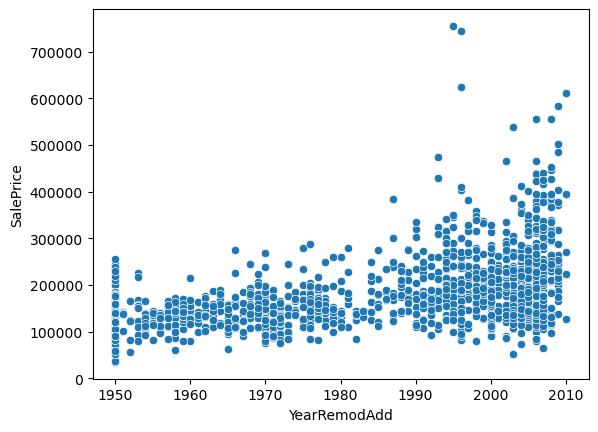

In [632]:
# draw a scatter plot of YearRemodAdd and SalePrice
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df)
plt.show()

### 3.8 RoofStyle

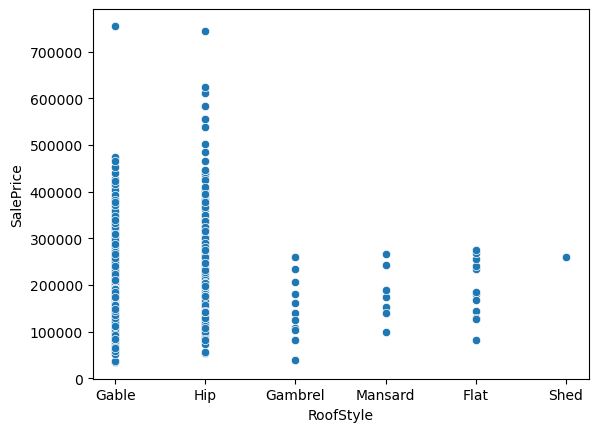

In [633]:
# scatter plot of RoofStyle and SalePrice
sns.scatterplot(x='RoofStyle', y='SalePrice', data=df)
plt.show()

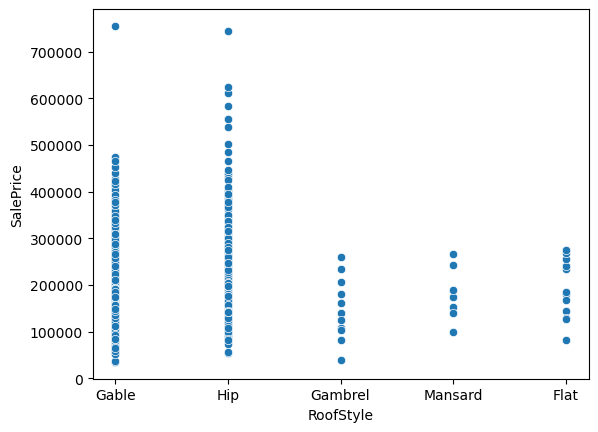

In [634]:
# drop the row with RoofStyle called Shed
df.drop(df[df['RoofStyle'] == 'Shed'].index, inplace = True)

# scatter plot of RoofStyle and SalePrice
sns.scatterplot(x='RoofStyle', y='SalePrice', data=df)
plt.show()

### 3.9 RoofMat1

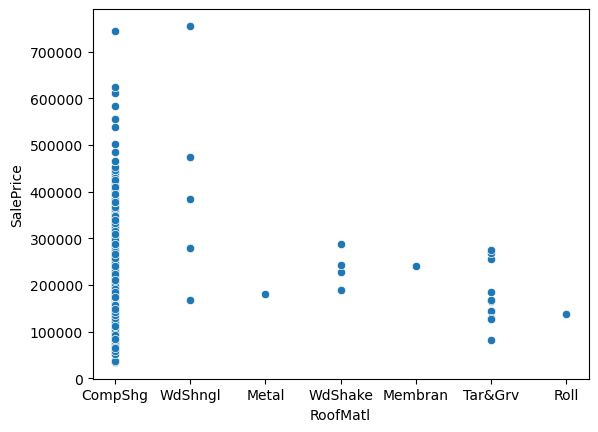

In [635]:
# scatter plot of RoofMatl and SalePrice
sns.scatterplot(x='RoofMatl', y='SalePrice', data=df)
plt.show()

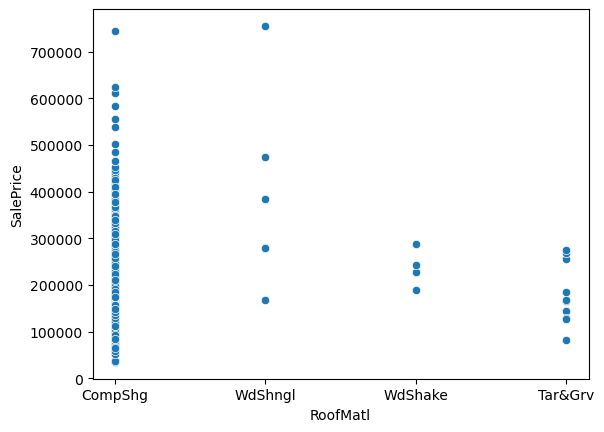

In [636]:
# drop the row with RoofMatl called Metal, Roll and Membran
df.drop(df[df['RoofMatl'] == 'Metal'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Roll'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Membran'].index, inplace = True)

# scatter plot of RoofMatl and SalePrice
sns.scatterplot(x='RoofMatl', y='SalePrice', data=df)
plt.show()

### 3.10 Exterior1st

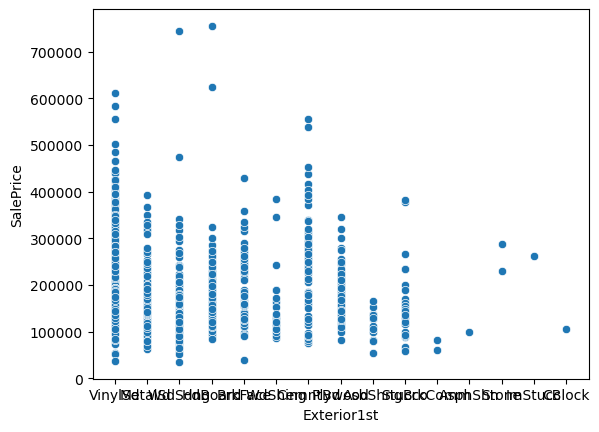

In [637]:
# scatter plot of Exterior1st and SalePrice
sns.scatterplot(x='Exterior1st', y='SalePrice', data=df)
plt.show()

In [638]:
# count the datapoints in Exterior1st
df['Exterior1st'].value_counts()


Exterior1st
VinylSd    512
HdBoard    221
MetalSd    217
Wd Sdng    200
Plywood    101
CemntBd     61
BrkFace     49
WdShing     26
Stucco      24
AsbShng     16
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

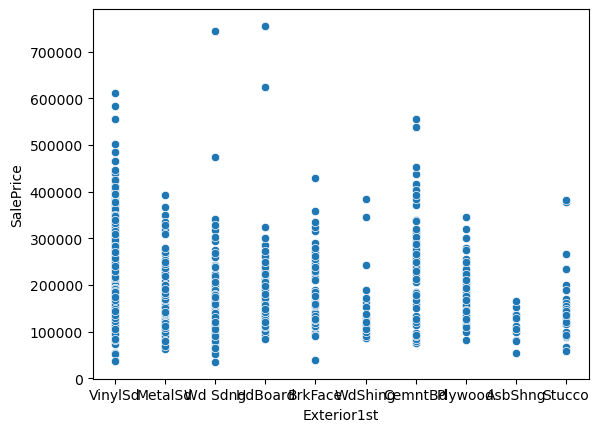

In [639]:
# drop the row with Exterior1st called BrkComm, Stone, AsphShn, ImStucc and CBlock
df.drop(df[df['Exterior1st'] == 'BrkComm'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'Stone'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'AsphShn'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'ImStucc'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'CBlock'].index, inplace = True)

# scatter plot of Exterior1st and SalePrice
sns.scatterplot(x='Exterior1st', y='SalePrice', data=df)
plt.show()

### 3.11 Exterior2nd

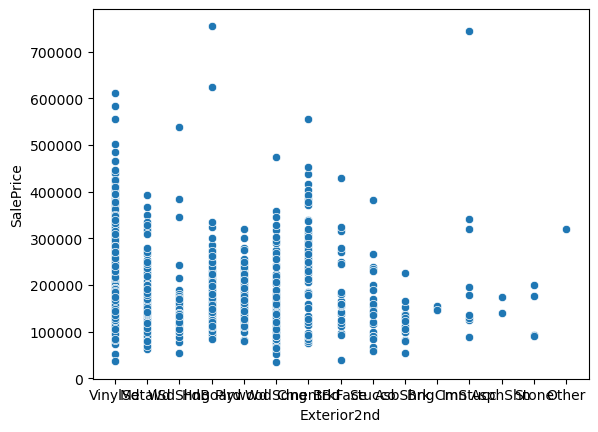

In [640]:
# scatter plot of Exterior2nd and SalePrice
sns.scatterplot(x='Exterior2nd', y='SalePrice', data=df)
plt.show()

In [641]:
# count the datapoints in Exterior2nd
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    501
MetalSd    211
HdBoard    204
Wd Sdng    193
Plywood    134
CmentBd     60
Wd Shng     38
BrkFace     24
Stucco      24
AsbShng     17
ImStucc      9
Brk Cmn      5
Stone        4
AsphShn      2
Other        1
Name: count, dtype: int64

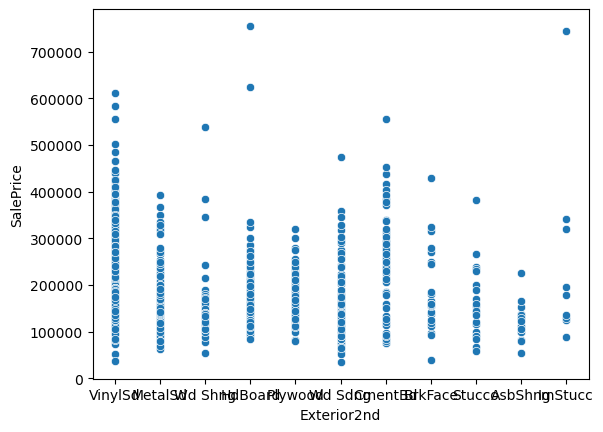

In [642]:
# drop the row with Exterior2nd called Brk Cmn, Stone, AsphShn and Other
df.drop(df[df['Exterior2nd'] == 'Brk Cmn'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'Stone'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'AsphShn'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'Other'].index, inplace = True)

# scatter plot of Exterior2nd and SalePrice
sns.scatterplot(x='Exterior2nd', y='SalePrice', data=df)
plt.show()

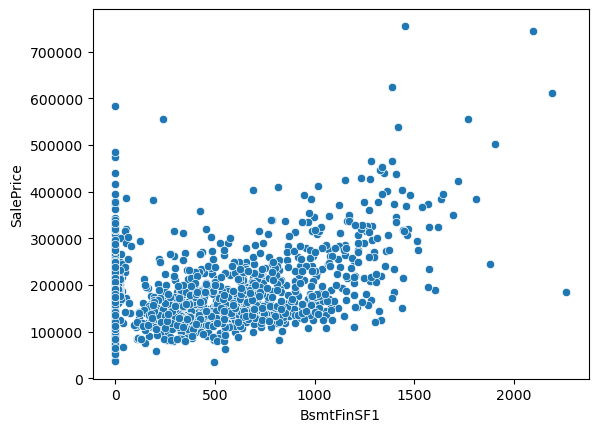

In [643]:
#  scatter plot of BsmtFinSF1 and SalePrice
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=df)
plt.show()

### 3.12 MasVnrArea

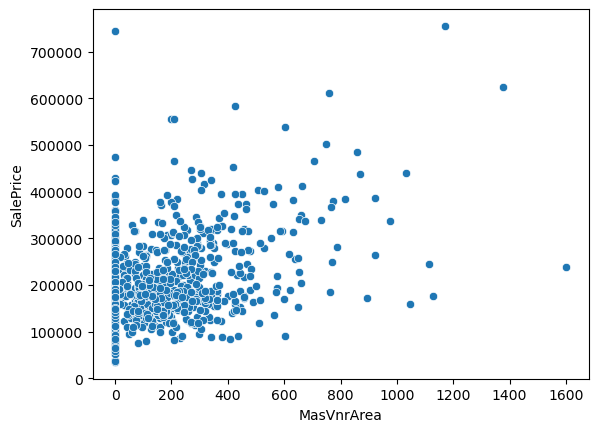

In [644]:
# draw a scatter plot of MasVnrArea and SalePrice
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df)
plt.show()

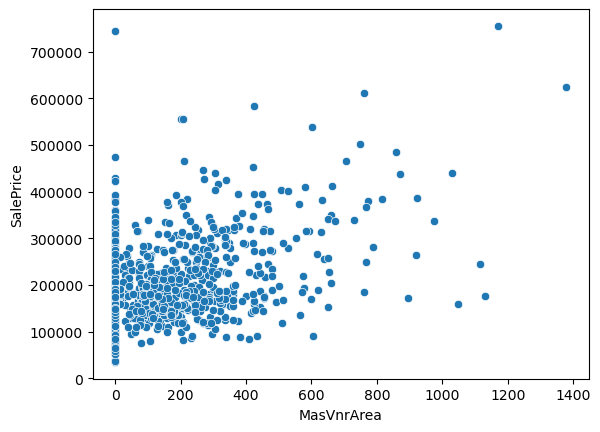

In [645]:
# drop the rows with MasVnrArea value over 1500
df.drop(df[df['MasVnrArea'] > 1500].index, inplace = True)

# draw a scatter plot of MasVnrArea and SalePrice
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df)
plt.show()

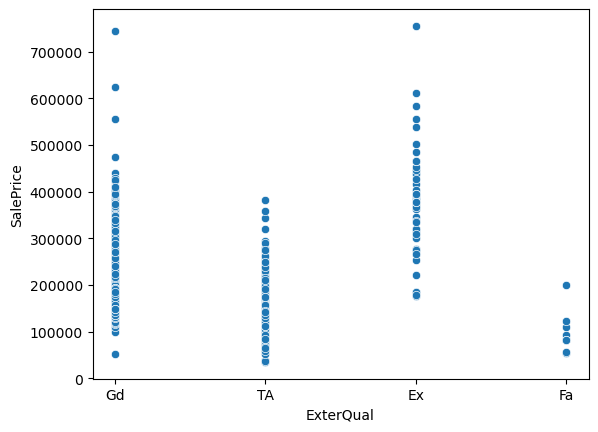

In [646]:
# draw a scatter plot of ExterQual and SalePrice
sns.scatterplot(x='ExterQual', y='SalePrice', data=df)
plt.show()

### 3.13 ExterCond

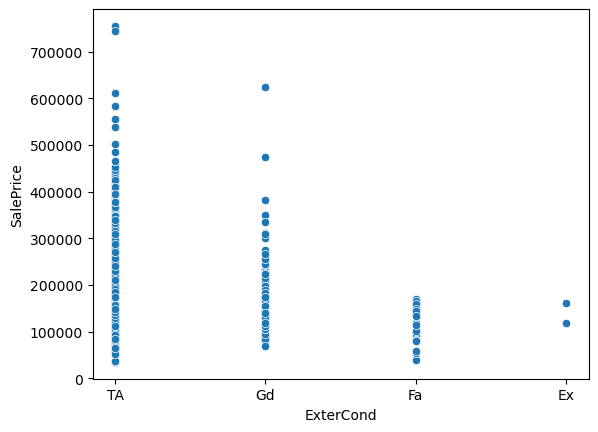

In [647]:
# draw a scatter plot of ExterCond and SalePrice
sns.scatterplot(x='ExterCond', y='SalePrice', data=df)
plt.show()

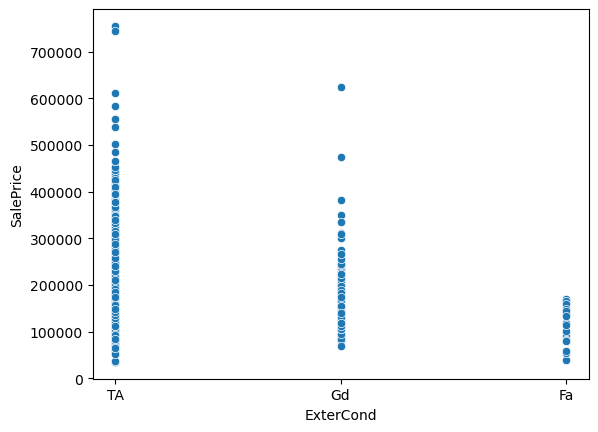

In [648]:
# drop the row with ExterCond called Ex
df.drop(df[df['ExterCond'] == 'Ex'].index, inplace = True)

# draw a scatter plot of ExterCond and SalePrice
sns.scatterplot(x='ExterCond', y='SalePrice', data=df)
plt.show()

### 3.14 Foundation

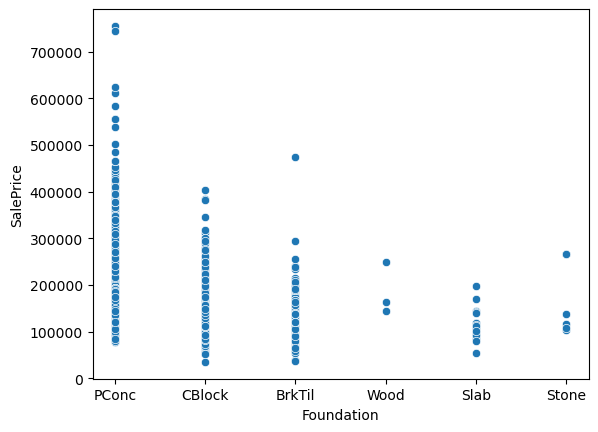

In [649]:
# draw a scatter plot of Foundation and SalePrice
sns.scatterplot(x='Foundation', y='SalePrice', data=df)
plt.show()

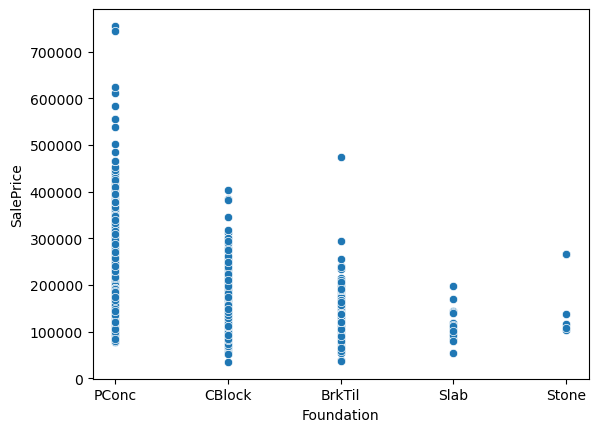

In [650]:
# drop the row with Foundation called Wood
df.drop(df[df['Foundation'] == 'Wood'].index, inplace = True)

# draw a scatter plot of Foundation and SalePrice
sns.scatterplot(x='Foundation', y='SalePrice', data=df)
plt.show()

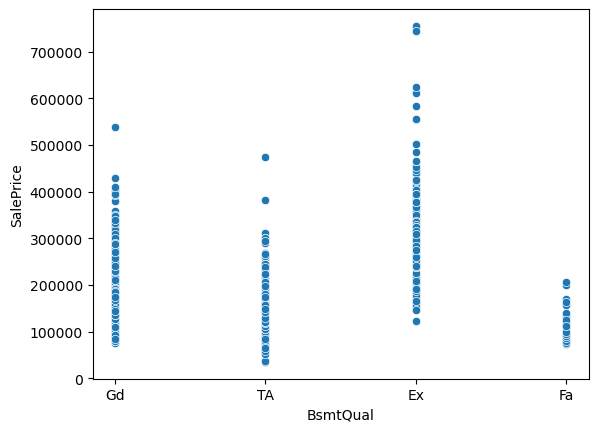

In [651]:
# scatter plot of BsmtQual and SalePrice
sns.scatterplot(x='BsmtQual', y='SalePrice', data=df)
plt.show()

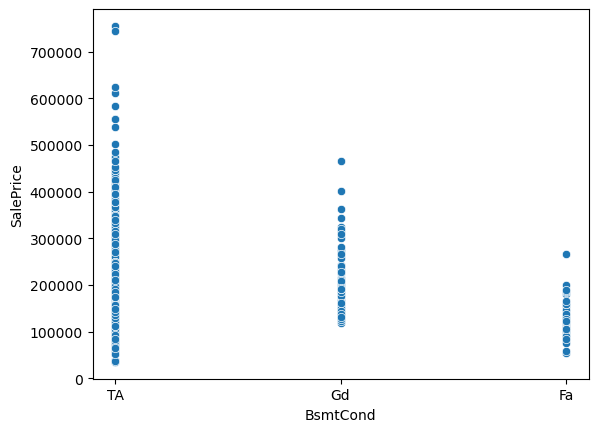

In [652]:
# draw a scatter plot of BsmtCond and SalePrice
sns.scatterplot(x='BsmtCond', y='SalePrice', data=df)
plt.show()

In [653]:
# drop the row with BsmtFinSF1 value over 5000
df.drop(df[df['BsmtFinSF1'] > 5000].index, inplace = True)

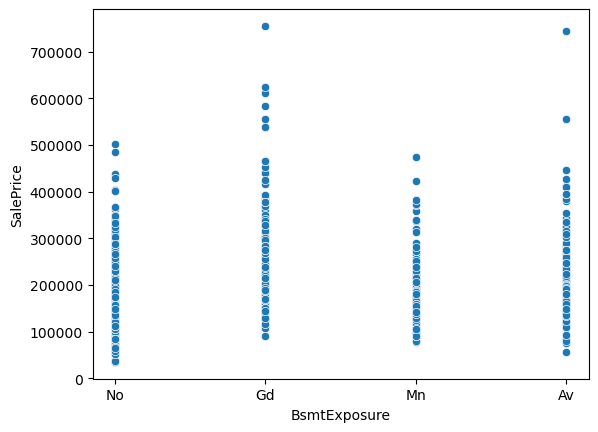

In [654]:
# draw a scatter plot of BsmtExposure and SalePrice
sns.scatterplot(x='BsmtExposure', y='SalePrice', data=df)
plt.show()

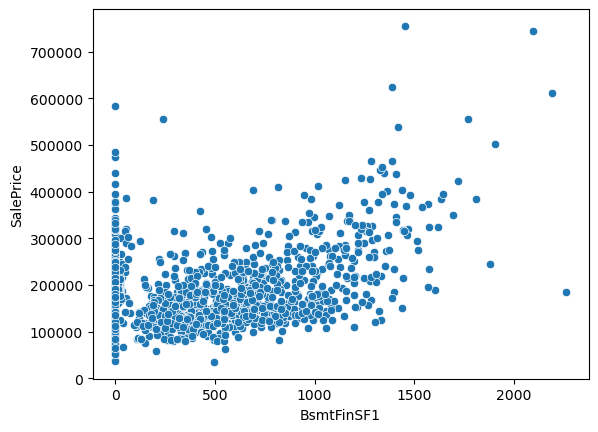

In [655]:
#  scatter plot of BsmtFinSF1 and SalePrice
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=df)
plt.show()

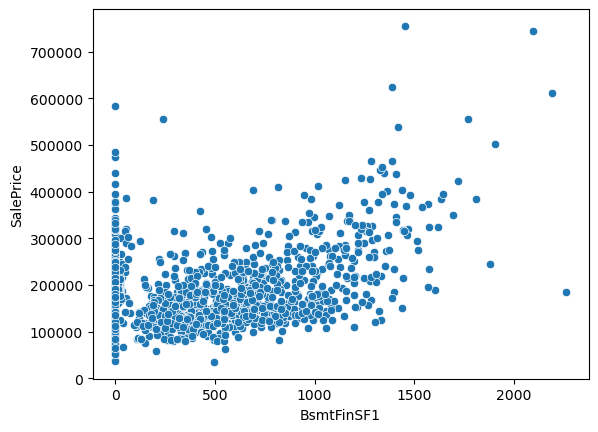

In [656]:
# draw a scatter plot of BsmtFinSF1 and SalePrice
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=df)
plt.show()

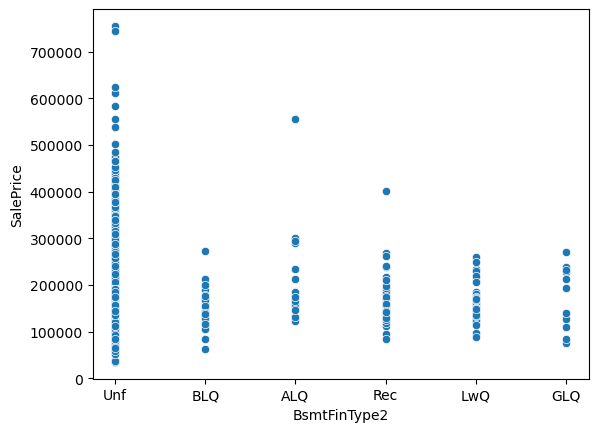

In [657]:
# scatter plot of BsmtFintype2 and SalePrice
sns.scatterplot(x='BsmtFinType2', y='SalePrice', data=df)
plt.show()

### 3.15 BsmtFinSF2

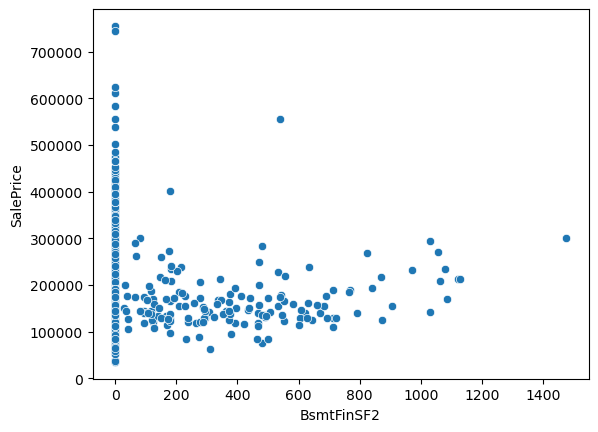

In [658]:
# scatter plot of BsmtFinSF2 and SalePrice
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df)
plt.show()

In [659]:
# drop the row with BsmtFinSF2 value over 1400
df.drop(df[df['BsmtFinSF2'] > 1400].index, inplace = True)

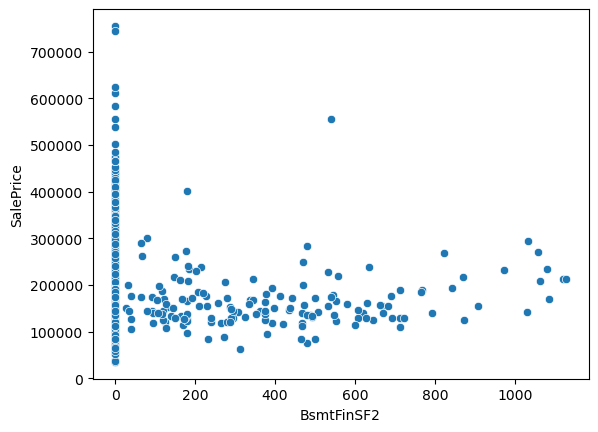

In [660]:
# scatter plot of BsmtFinSF2 and SalePrice
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df)
plt.show()

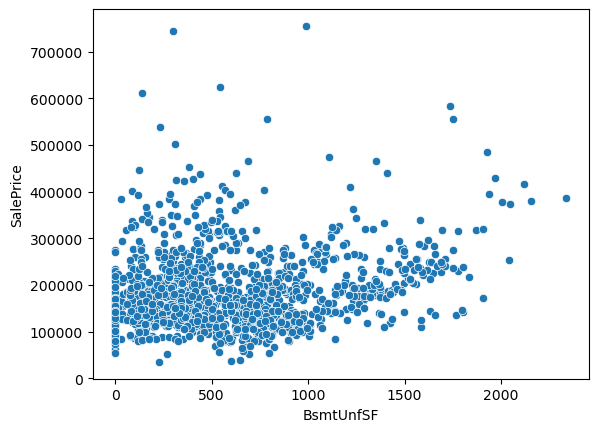

In [661]:
# scatter plot of BsmtUnfSF and SalePrice
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=df)
plt.show()

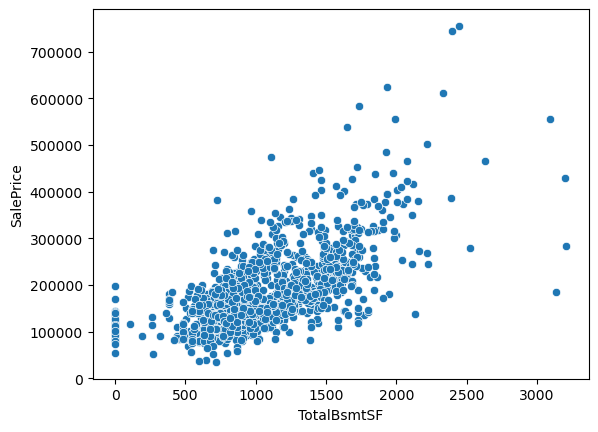

In [662]:
# scatter plot of TotalBsmtSF and SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

### 3.16 Heating

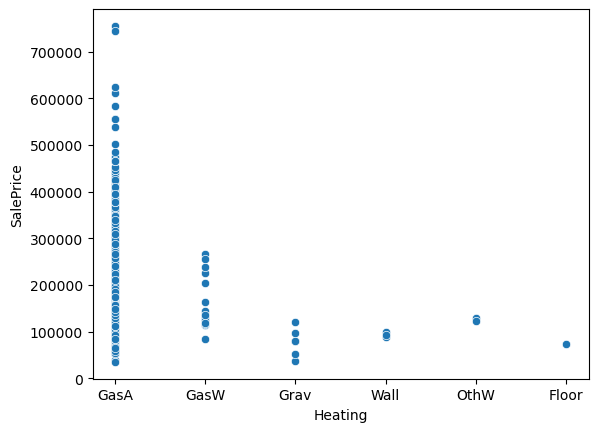

In [663]:
# scatter plot of Heat and SalePrice
sns.scatterplot(x='Heating', y='SalePrice', data=df)
plt.show()

In [664]:
# count the values of Heating
df['Heating'].value_counts()

Heating
GasA     1381
GasW       15
Grav        6
Wall        3
OthW        2
Floor       1
Name: count, dtype: int64

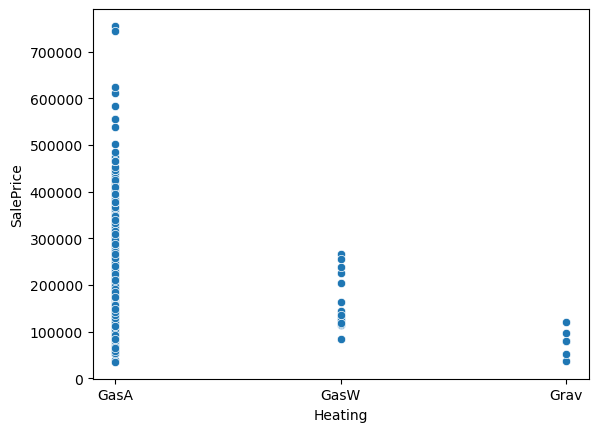

In [665]:
# drop the row with Heating called Floor, Wall and OthW
df.drop(df[df['Heating'] == 'Floor'].index, inplace = True)
df.drop(df[df['Heating'] == 'Wall'].index, inplace = True)
df.drop(df[df['Heating'] == 'OthW'].index, inplace = True)

# draw a scatter plot of Heating and SalePrice
sns.scatterplot(x='Heating', y='SalePrice', data=df)
plt.show()

### 3.17 HeatingQC

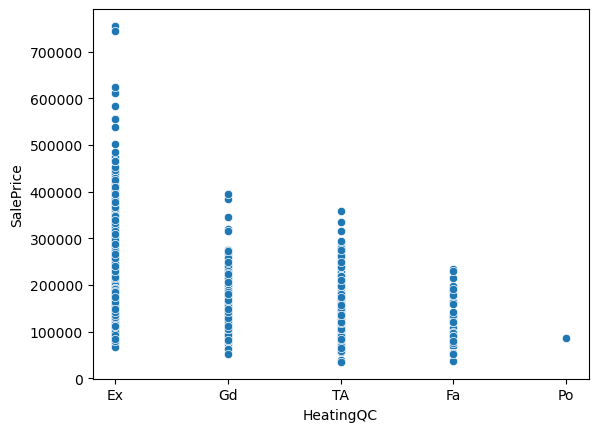

In [666]:
# scatter plot of HeatingQC and SalePrice
sns.scatterplot(x='HeatingQC', y='SalePrice', data=df)
plt.show()

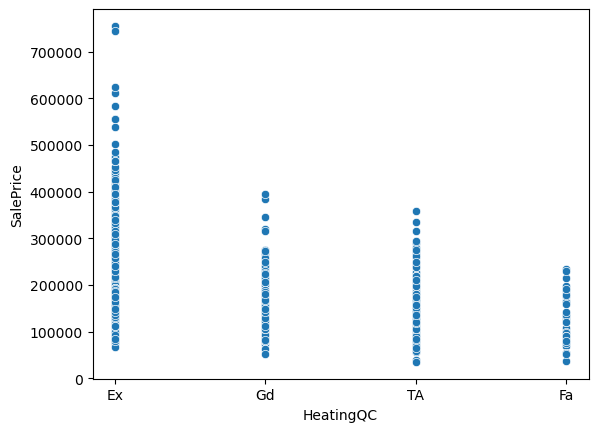

In [667]:
# drop the rows with HeatingQC value Po
df.drop(df[df['HeatingQC'] == 'Po'].index, inplace = True)

# draw a scatter plot of HeatingQC and SalePrice
sns.scatterplot(x='HeatingQC', y='SalePrice', data=df)
plt.show()

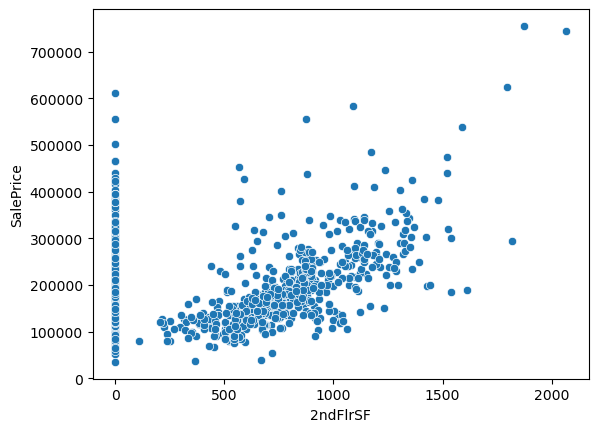

In [668]:
# draw a scatter plot of 2ndFlrSF and SalePrice
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df)
plt.show()

### 3.18 Electrical

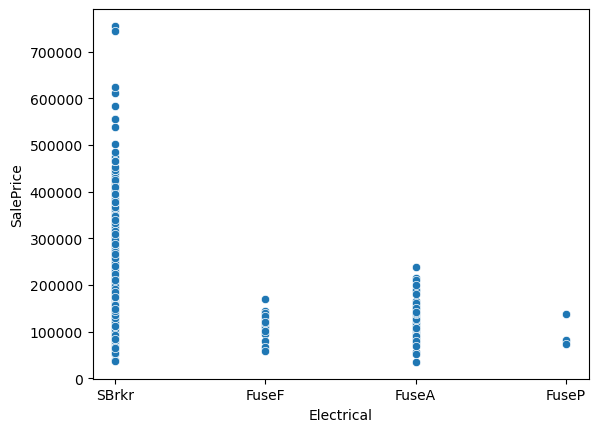

In [669]:
# scatter plot of Electrical and SalePrice
sns.scatterplot(x='Electrical', y='SalePrice', data=df)
plt.show()

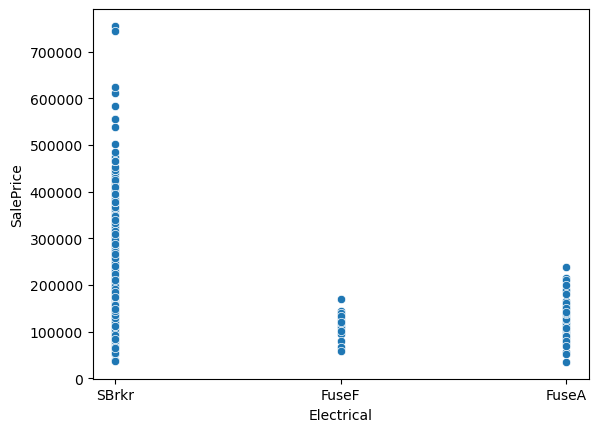

In [670]:
# drop the row with Electrical value FuseP
df.drop(df[df['Electrical'] == 'FuseP'].index, inplace = True)

# draw a scatter plot of Electrical and SalePrice
sns.scatterplot(x='Electrical', y='SalePrice', data=df)
plt.show()

### 3.19 1stFlrSF

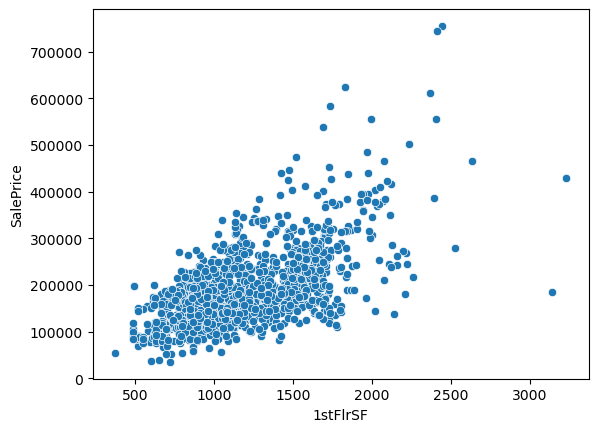

In [671]:
# scatter plot of 1stFlrSF and SalePrice
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df)
plt.show()

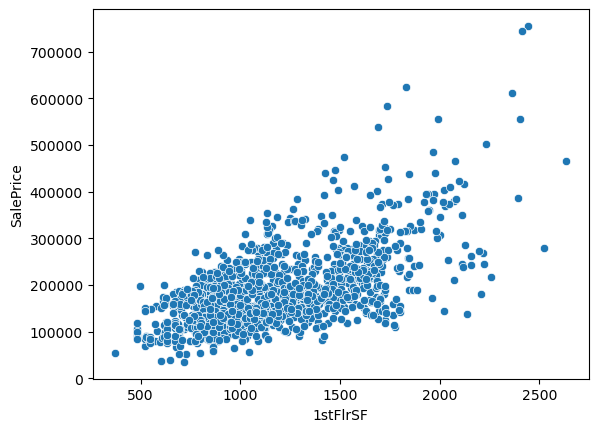

In [672]:
# drop the row with 1stFlrSF value over 3000
df.drop(df[df['1stFlrSF'] > 3000].index, inplace = True)

# draw a scatter plot of 1stFlrSF and SalePrice
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df)
plt.show()

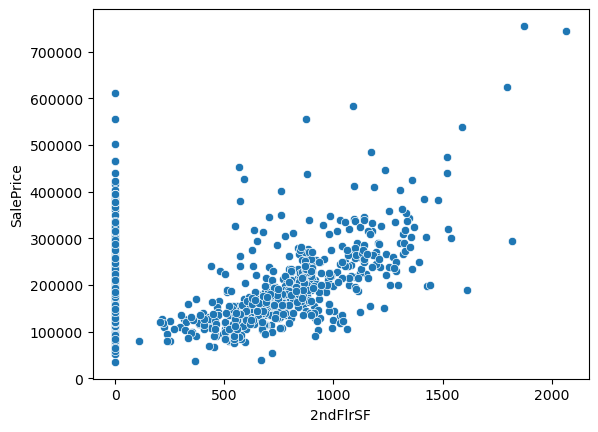

In [673]:
# scatter plot of 2ndFlrSF and SalePrice
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df)
plt.show()

### 3.20 LowQualFinSF

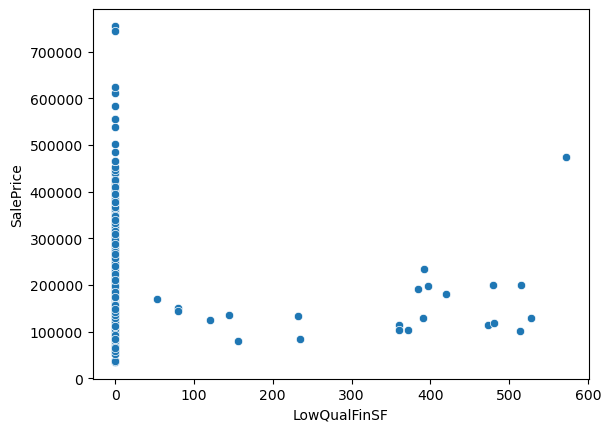

In [674]:
# scatter plot of LowQualFinSF and SalePrice
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=df)
plt.show()

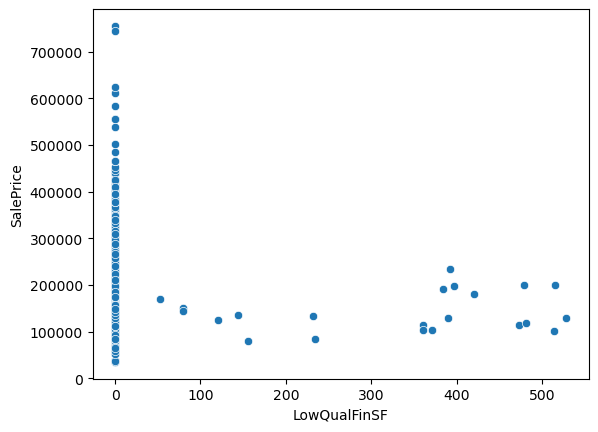

In [675]:
# drop the row with LowQualFinSF value over 550
df.drop(df[df['LowQualFinSF'] > 550].index, inplace = True)

# draw a scatter plot of LowQualFinSF and SalePrice
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=df)
plt.show()

### 3.21 GrLivArea

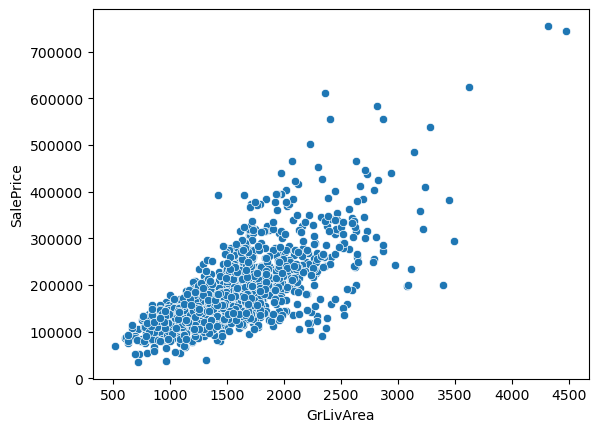

In [676]:
# draw a scatter plot of GrLivArea and SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

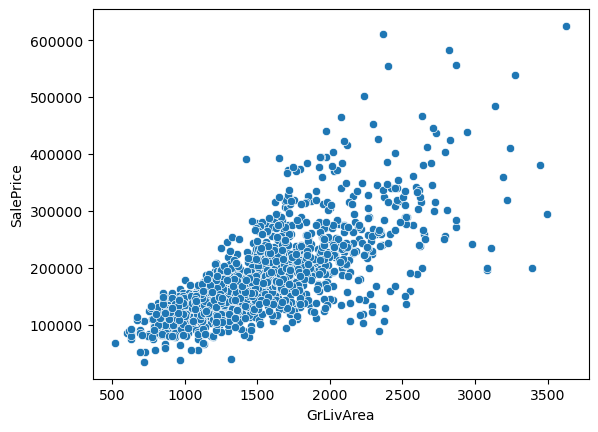

In [677]:
# drop the row with GrLivArea value over 4000
df.drop(df[df['GrLivArea'] > 4000].index, inplace = True)

# draw a scatter plot of GrLivArea and SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

### 3.22 BsmtFullBath

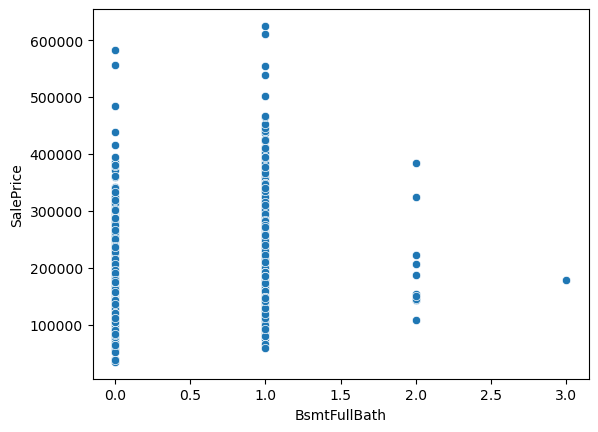

In [678]:
# draw a scatter plot of BsmtFullBath and SalePrice
sns.scatterplot(x='BsmtFullBath', y='SalePrice', data=df)
plt.show()

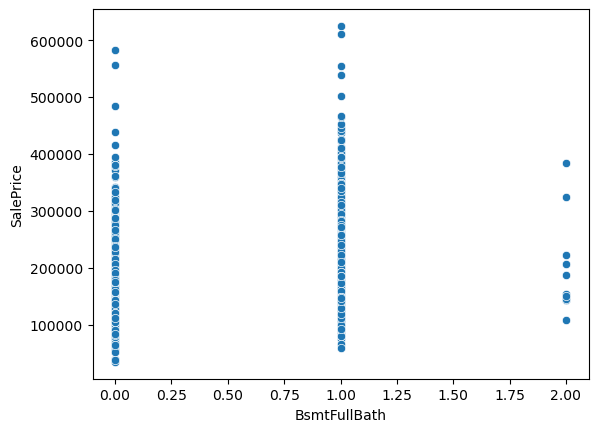

In [679]:
# drop the row with BsmtFullBath value 3
df.drop(df[df['BsmtFullBath'] == 3].index, inplace = True)

# draw a scatter plot of BsmtFullBath and SalePrice
sns.scatterplot(x='BsmtFullBath', y='SalePrice', data=df)
plt.show()

### 3.23 BsmtHalfBath

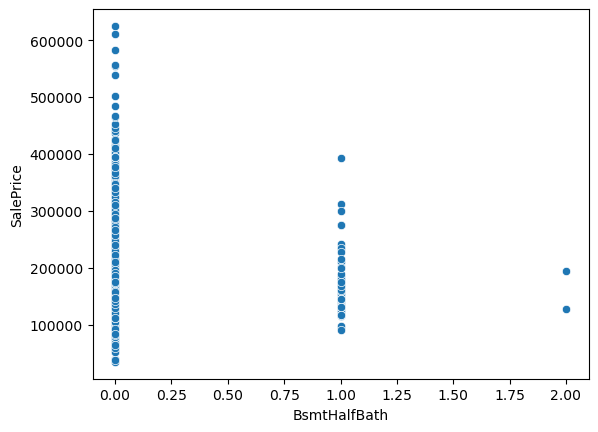

In [680]:
# scatter plot of BsmtHalfBath and SalePrice
sns.scatterplot(x='BsmtHalfBath', y='SalePrice', data=df)
plt.show()

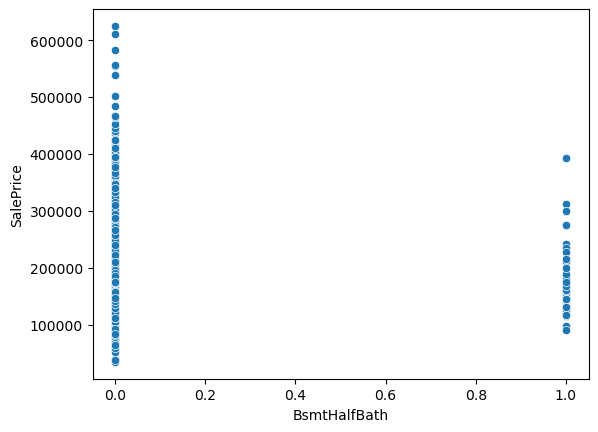

In [681]:
# drop the value in BsmtHalfBath 2
df.drop(df[df['BsmtHalfBath'] == 2].index, inplace = True)

# draw a scatter plot of BsmtHalfBath and SalePrice
sns.scatterplot(x='BsmtHalfBath', y='SalePrice', data=df)
plt.show()

### 3.24 FullBath

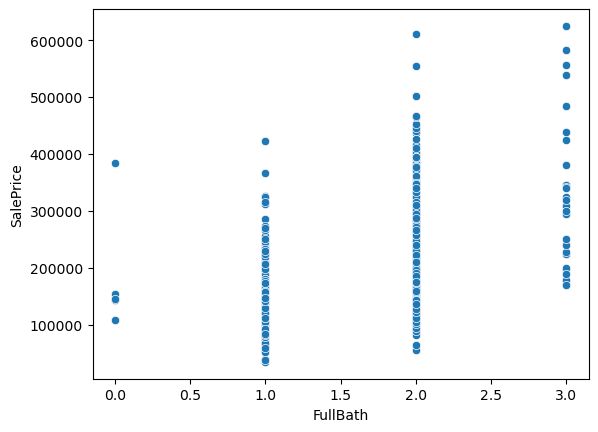

In [682]:
# scatter plot of FullBath and SalePrice
sns.scatterplot(x='FullBath', y='SalePrice', data=df)
plt.show()

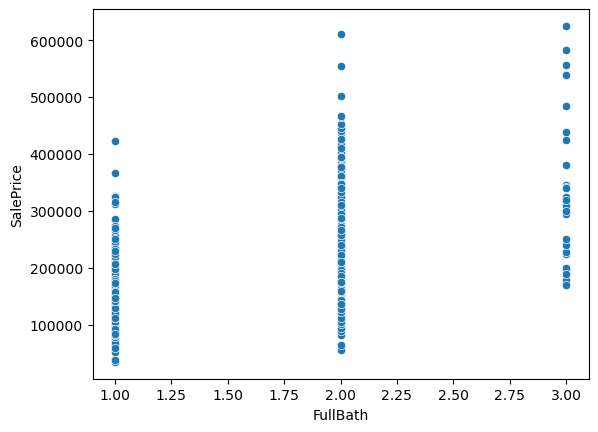

In [683]:
# drop the values in FUllBath 0
df.drop(df[df['FullBath'] == 0].index, inplace = True)

# draw a scatter plot of FullBath and SalePrice
sns.scatterplot(x='FullBath', y='SalePrice', data=df)
plt.show()

### 3.25 HalfBath

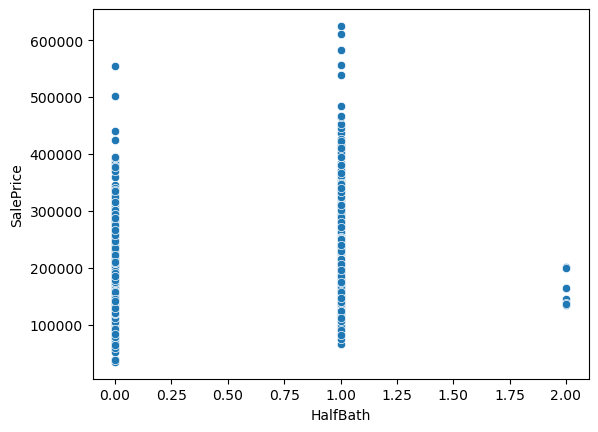

In [684]:
# scatter plot of HalfBath and SalePrice
sns.scatterplot(x='HalfBath', y='SalePrice', data=df)
plt.show()

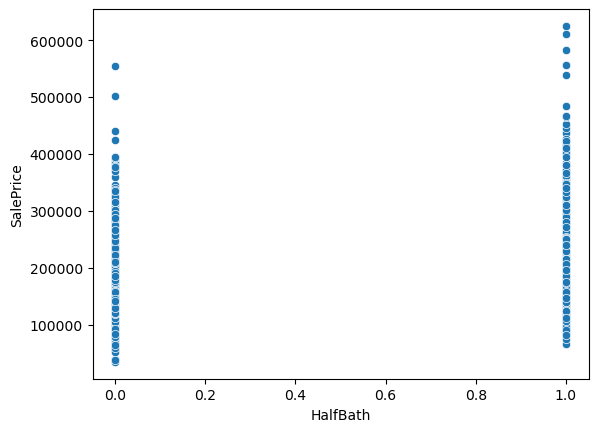

In [685]:
# drop the values in HalfBath 2
df.drop(df[df['HalfBath'] == 2].index, inplace = True)

# draw a scatter plot of HalfBath and SalePrice
sns.scatterplot(x='HalfBath', y='SalePrice', data=df)
plt.show()

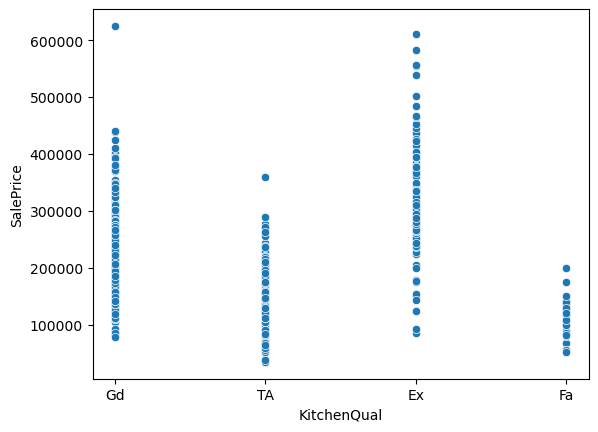

In [686]:
# scatter plot of KitchenQual and SalePrice
sns.scatterplot(x='KitchenQual', y='SalePrice', data=df)
plt.show()

### 3.26 TotRmsAbvGrd

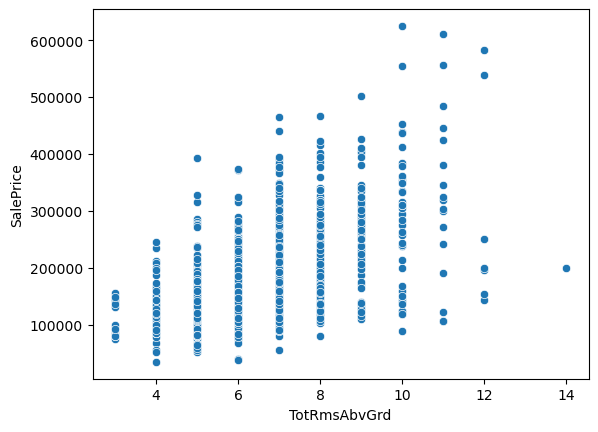

In [687]:
# scatter plot of TotRmsAbvGrd and SalePrice
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.show()

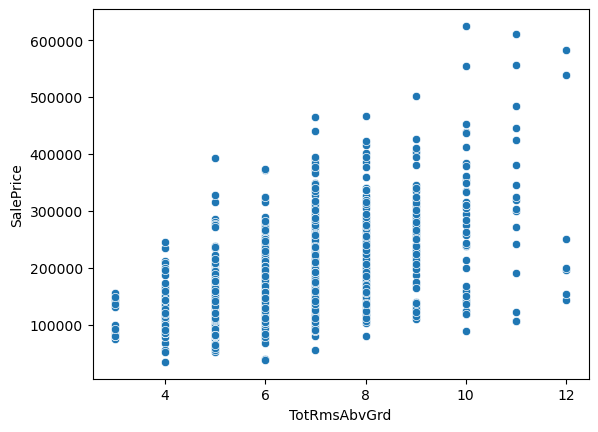

In [688]:
# drop the row with TotRmsAbvGrd value over 13
df.drop(df[df['TotRmsAbvGrd'] > 13].index, inplace = True)

# draw a scatter plot of TotRmsAbvGrd and SalePrice
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.show()

### 3.27 Functional

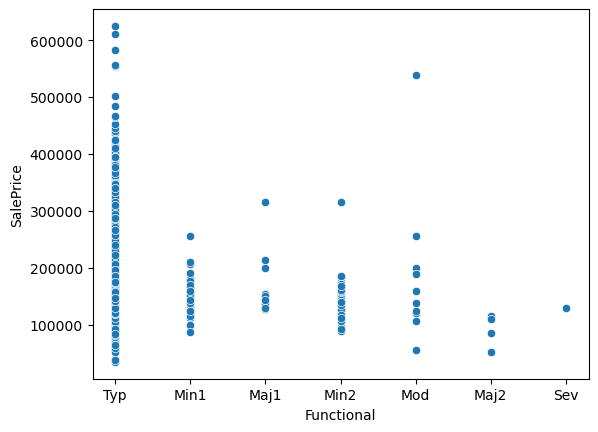

In [689]:
# scatter plot of Functional and SalePrice
sns.scatterplot(x='Functional', y='SalePrice', data=df)
plt.show()

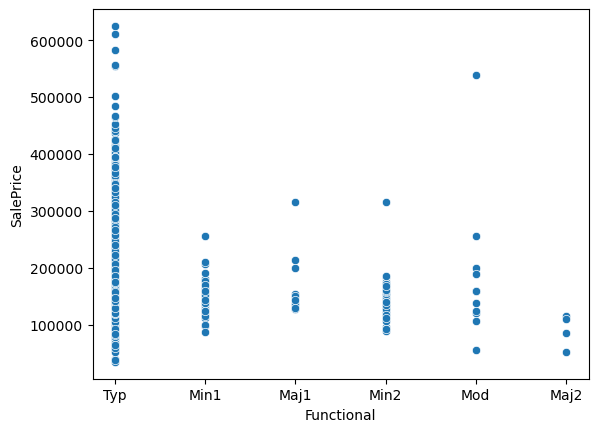

In [690]:
# drop the row with Functional value Sev
df.drop(df[df['Functional'] == 'Sev'].index, inplace = True)

# draw a scatter plot of Functional and SalePrice
sns.scatterplot(x='Functional', y='SalePrice', data=df)
plt.show()

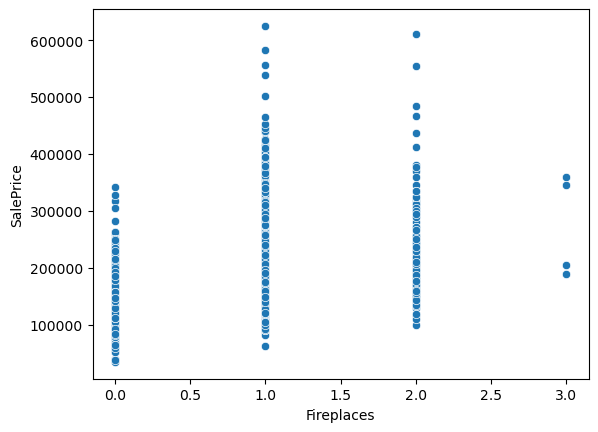

In [691]:
# scatter plot of Fireplaces and SalePrice
sns.scatterplot(x='Fireplaces', y='SalePrice', data=df)
plt.show()

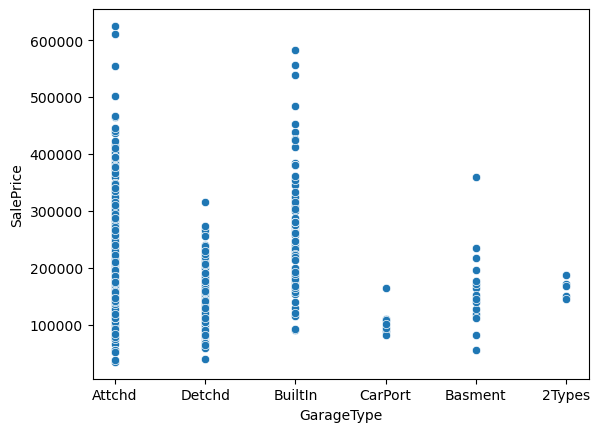

In [692]:
# draw a scatter plot of GarageType and SalePrice
sns.scatterplot(x='GarageType', y='SalePrice', data=df)
plt.show()

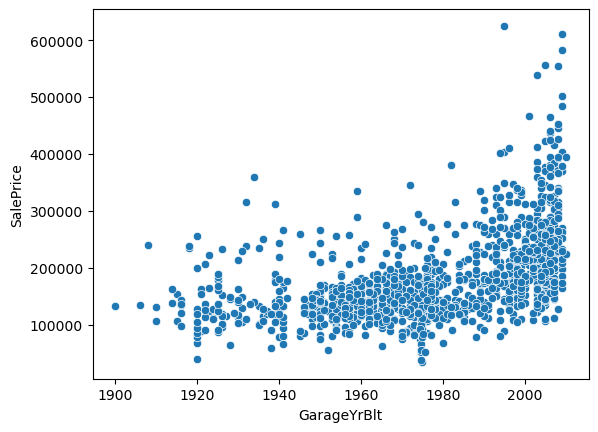

In [693]:
# scatter plot of GarageYrBlt and SalePrice
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=df)
plt.show()

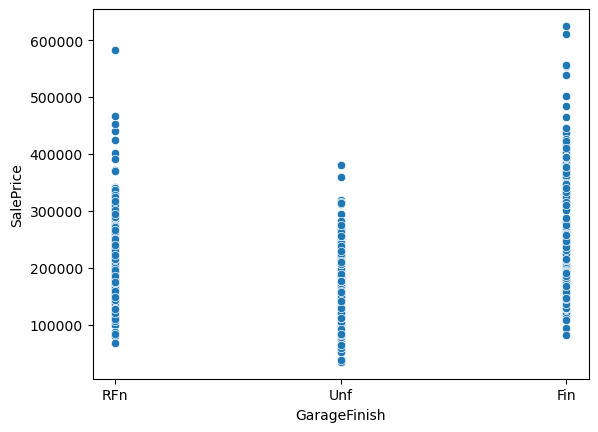

In [694]:
# scatter plot of GarageFinish and SalePrice
sns.scatterplot(x='GarageFinish', y='SalePrice', data=df)
plt.show()

### 3.28 GarageCars

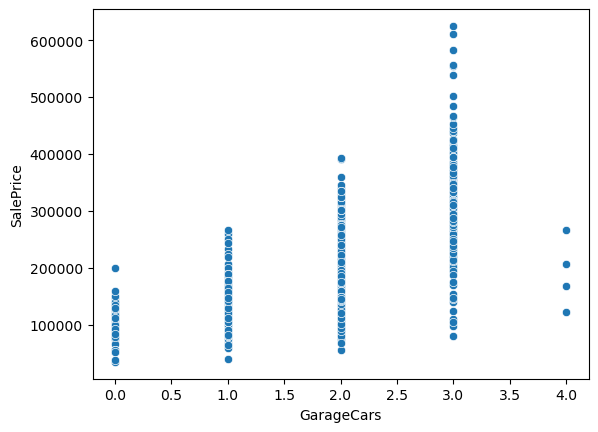

In [695]:
# scatter plot of GarageCars and SalePrice
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)
plt.show()

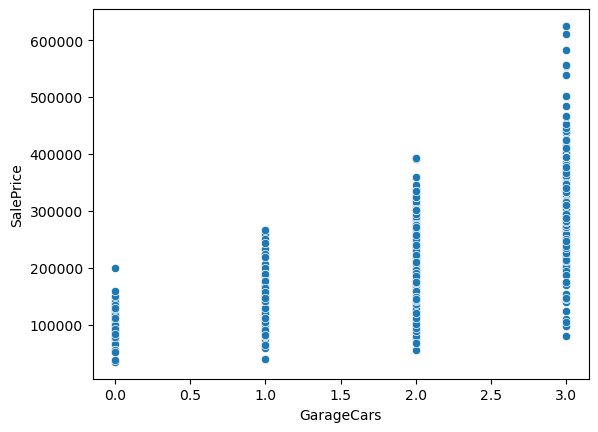

In [696]:
# drop the row with GarageCars value over 3.5
df.drop(df[df['GarageCars'] > 3.5].index, inplace = True)

# draw a scatter plot of GarageCars and SalePrice
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)
plt.show()

### 3.29 GarageArea

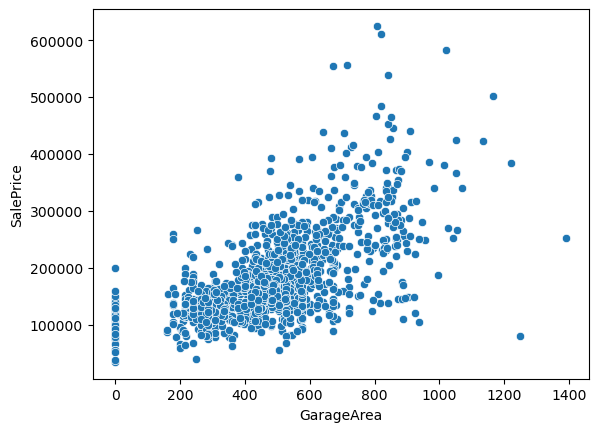

In [697]:
# draw a scatter plot of GarageArea and SalePrice
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.show()

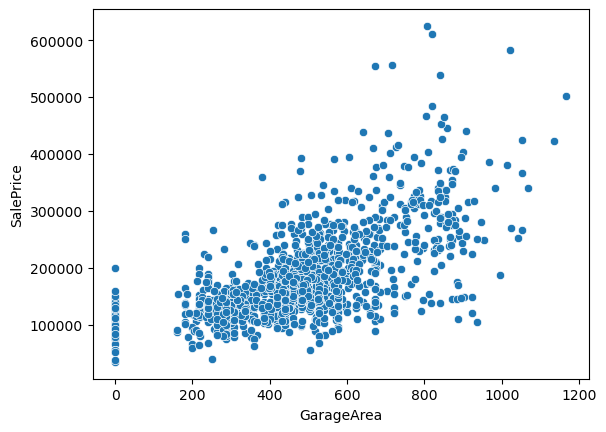

In [698]:
# drop the row with GarageArea value over 1200
df.drop(df[df['GarageArea'] > 1200].index, inplace = True)

# draw a scatter plot of GarageArea and SalePrice
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.show()

### 3.30 GarageQual

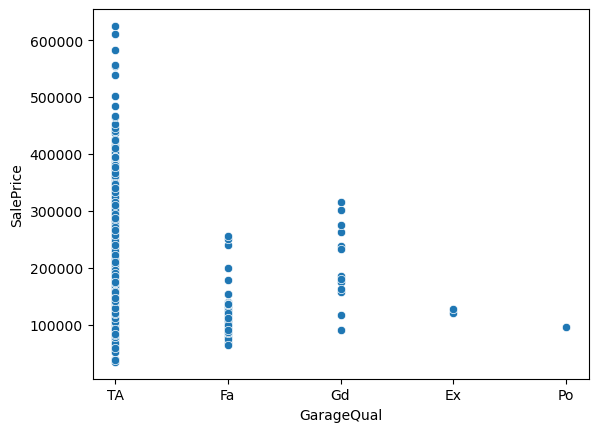

In [699]:
# draw a scatter plot of GarageQual and SalePrice
sns.scatterplot(x='GarageQual', y='SalePrice', data=df)
plt.show()

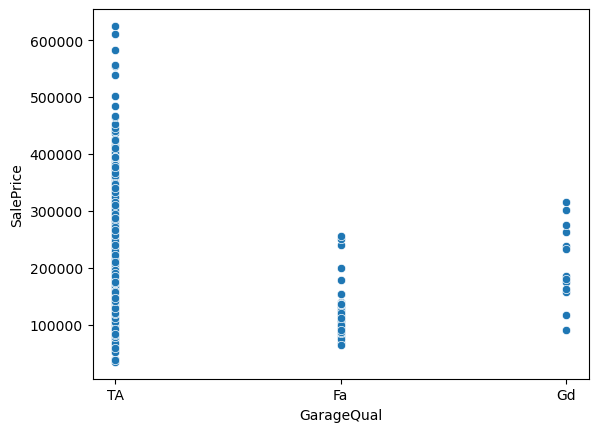

In [700]:
# drop the row with GarageQual value Ex and Po
df.drop(df[df['GarageQual'] == 'Ex'].index, inplace = True)
df.drop(df[df['GarageQual'] == 'Po'].index, inplace = True)

# draw a scatter plot of GarageQual and SalePrice
sns.scatterplot(x='GarageQual', y='SalePrice', data=df)
plt.show()

### 3.31 GarageCond

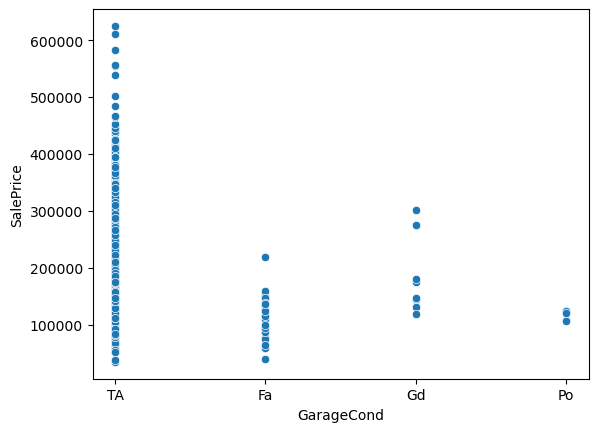

In [701]:
# draw a scatter plot of GarageCond and SalePrice
sns.scatterplot(x='GarageCond', y='SalePrice', data=df)
plt.show()

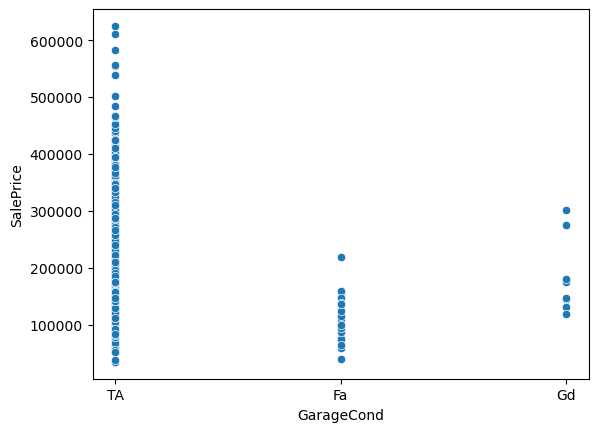

In [702]:
# drop the row with GarageCond value Po
df.drop(df[df['GarageCond'] == 'Po'].index, inplace = True)

# draw a scatter plot of GarageCond and SalePrice
sns.scatterplot(x='GarageCond', y='SalePrice', data=df)
plt.show()

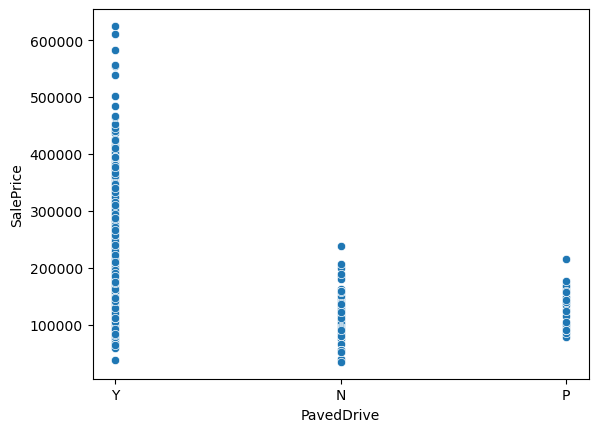

In [703]:
# draw a scatter plot of PavedDrive and SalePrice
sns.scatterplot(x='PavedDrive', y='SalePrice', data=df)
plt.show()

### 3.32 WoodDeckSF

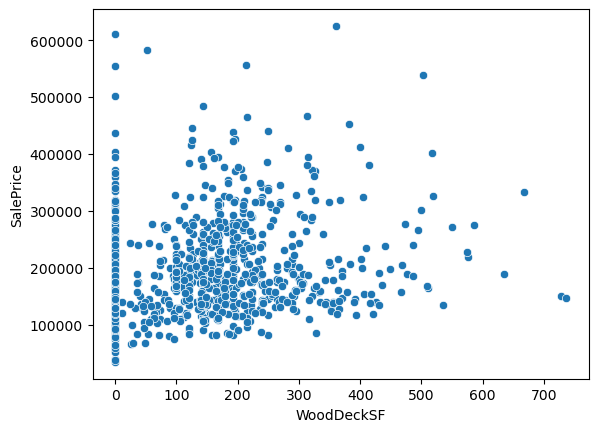

In [704]:
# draw a scatter plot of WoodDeckSF and SalePrice
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=df)
plt.show()

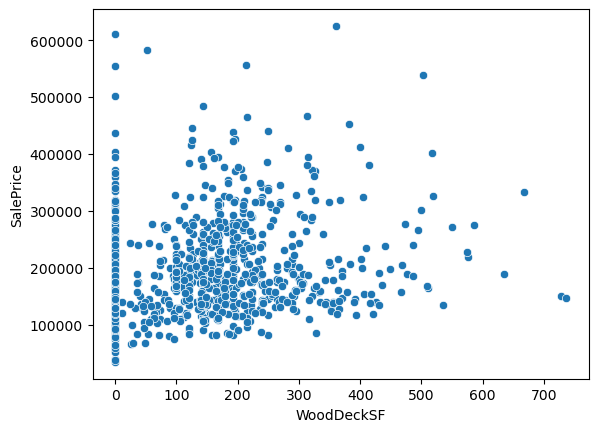

In [705]:
# drop the row with WoodDeckSF value over 800
df.drop(df[df['WoodDeckSF'] > 800].index, inplace = True)

# draw a scatter plot of WoodDeckSF and SalePrice
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=df)
plt.show()

### 3.33 OpenPorchSF

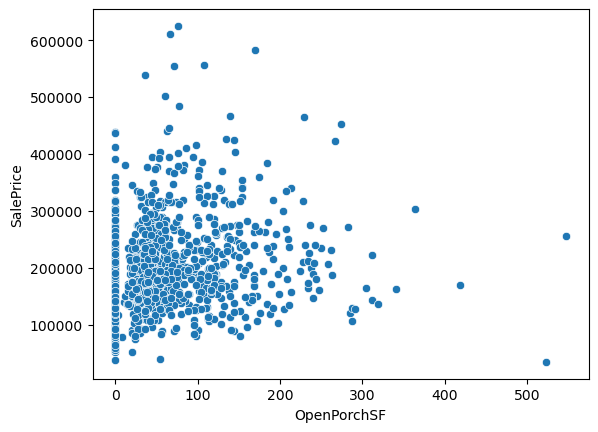

In [706]:
# draw a scatter plot of OpenPorchSF and SalePrice
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=df)
plt.show()

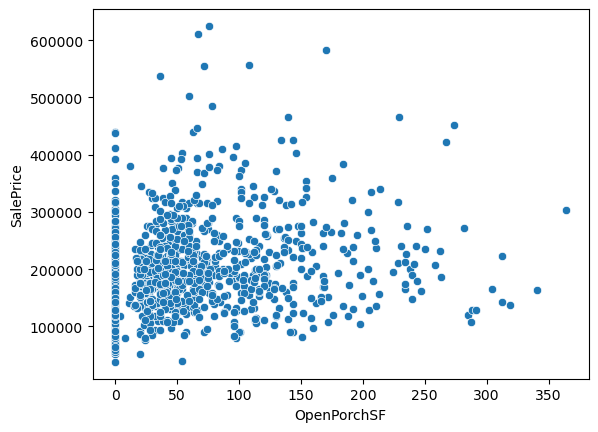

In [707]:
# drop the row with OpenPorchSF value over 400
df.drop(df[df['OpenPorchSF'] > 400].index, inplace = True)

# draw a scatter plot of OpenPorchSF and SalePrice
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=df)
plt.show()

### 3.34 EnclosedPorch

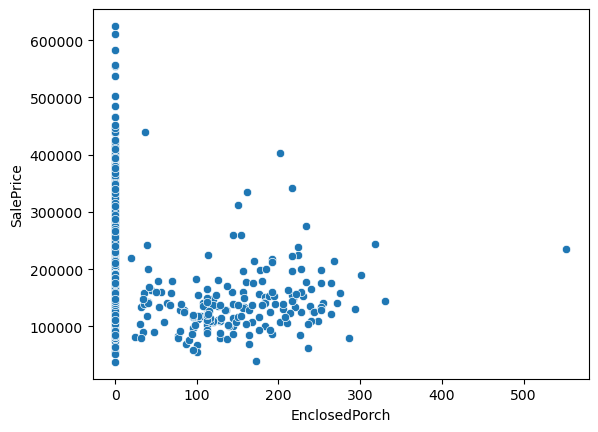

In [708]:
# draw a scatter plot of EnclosedPorch and SalePrice
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=df)
plt.show()

In [709]:
# drop the row with EnclosedPorch value over 500
df.drop(df[df['EnclosedPorch'] > 500].index, inplace = True)

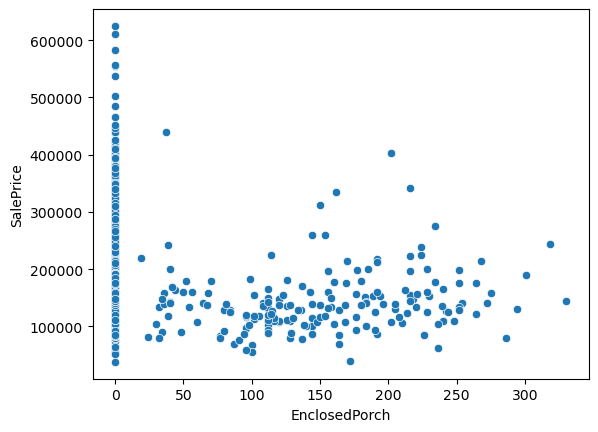

In [710]:
# draw a scatter plot of EnclosedPorch and SalePrice
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=df)
plt.show()

### 3.35 3SsnPorch

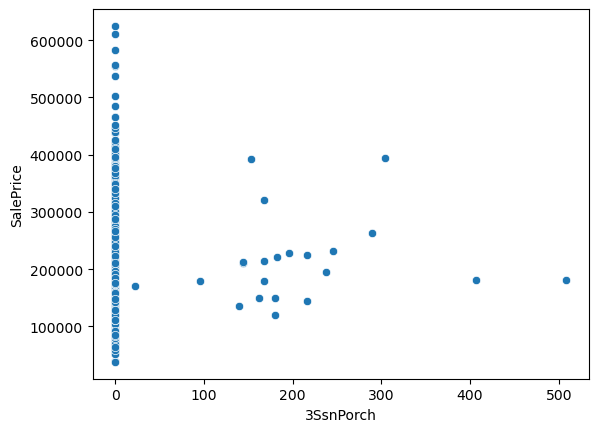

In [711]:
# draw a scatter plot of 3SsnPorch and SalePrice
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=df)
plt.show()

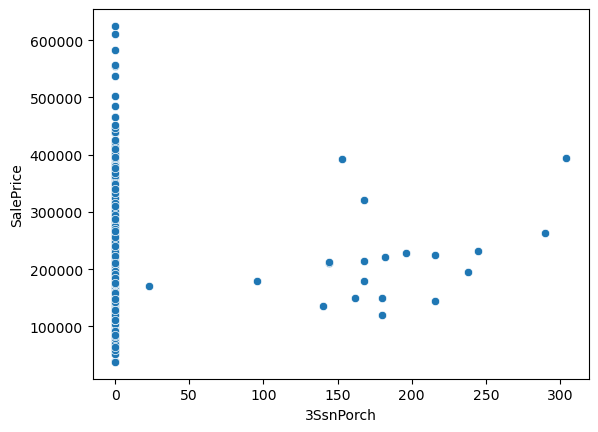

In [712]:
# drop the row with 3SsnPorch value over 350
df.drop(df[df['3SsnPorch'] > 350].index, inplace = True)

# draw a scatter plot of 3SsnPorch and SalePrice
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=df)
plt.show()

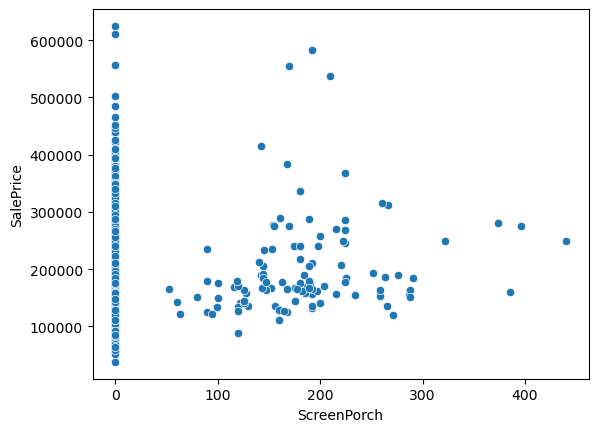

In [713]:
# draw a scatter plot of ScreenPorch and SalePrice
sns.scatterplot(x='ScreenPorch', y='SalePrice', data=df)
plt.show()

### 3.36 PoolArea

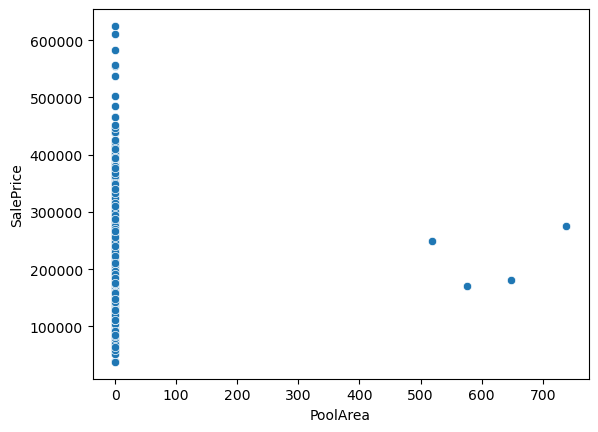

In [714]:
# scatter plot of PoolArea and SalePrice
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.show()

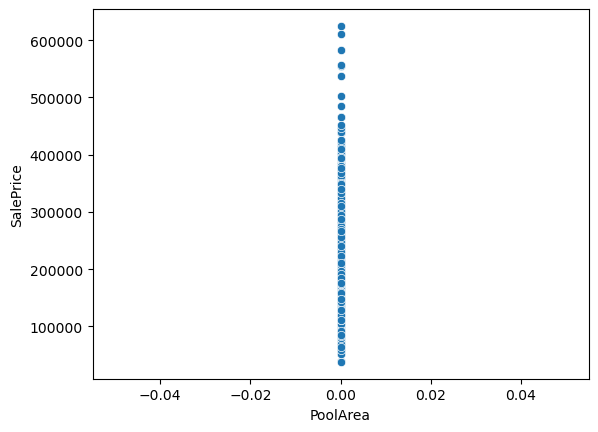

In [715]:
# drop the row with PoolArea value over 400
df.drop(df[df['PoolArea'] > 400].index, inplace = True)

# draw a scatter plot of PoolArea and SalePrice
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.show()

### 3.37 MiscVal

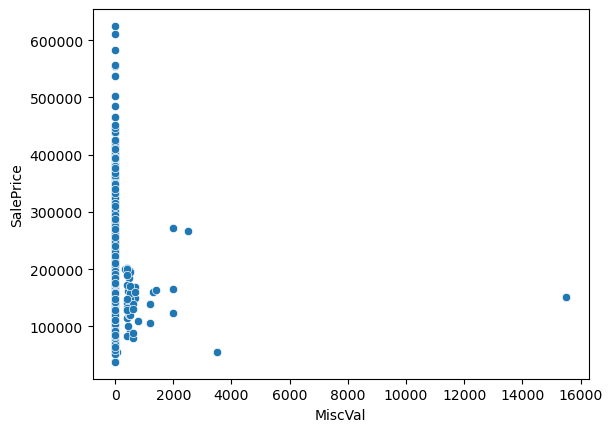

In [716]:
# draw a scatter plot of MiscVal and SalePrice
sns.scatterplot(x='MiscVal', y='SalePrice', data=df)
plt.show()

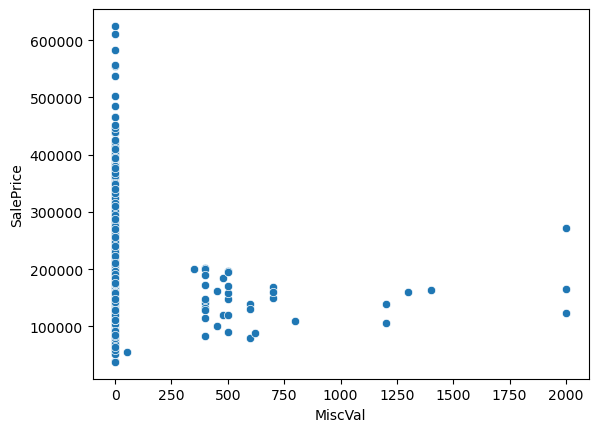

In [717]:
# drop the row with MiscVal value over 2000
df.drop(df[df['MiscVal'] > 2000].index, inplace = True)

# draw a scatter plot of MiscVal and SalePrice
sns.scatterplot(x='MiscVal', y='SalePrice', data=df)
plt.show()

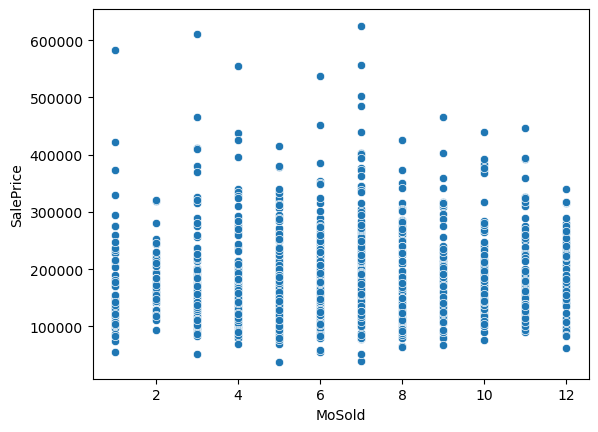

In [718]:
# draw a scatter plot of MoSold and SalePrice
sns.scatterplot(x='MoSold', y='SalePrice', data=df)
plt.show()

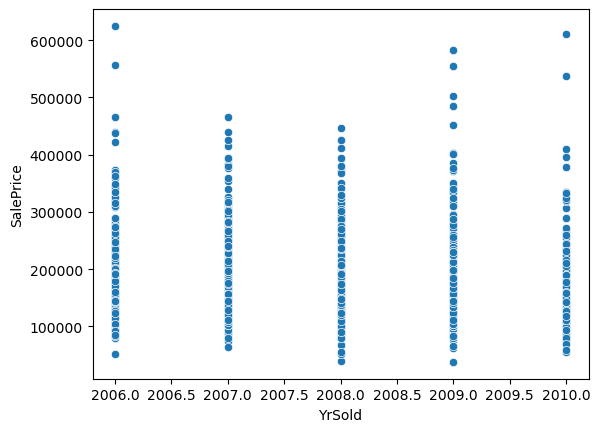

In [719]:
# draw a scatter plot of YrSold and SalePrice
sns.scatterplot(x='YrSold', y='SalePrice', data=df)
plt.show()

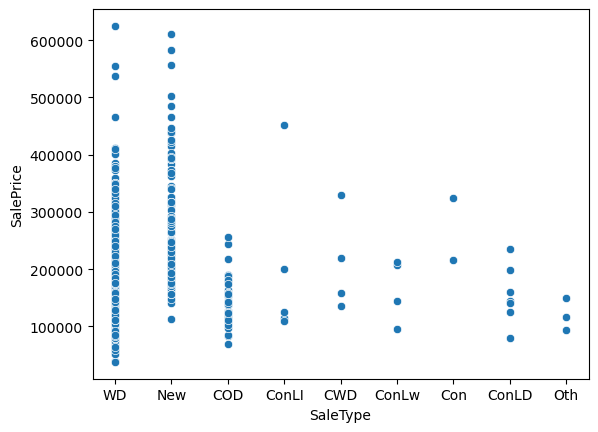

In [720]:
# draw a scatter plot of saletype and SalePrice
sns.scatterplot(x='SaleType', y='SalePrice', data=df)
plt.show()

### 3.38 SaleCondition

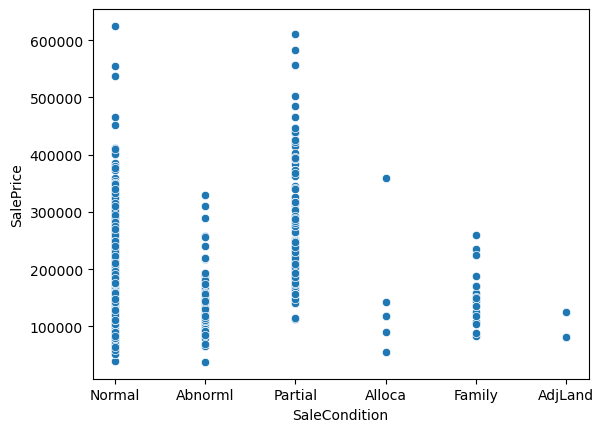

In [721]:
# draw a scatter plot of salecondition and SalePrice
sns.scatterplot(x='SaleCondition', y='SalePrice', data=df)
plt.show()

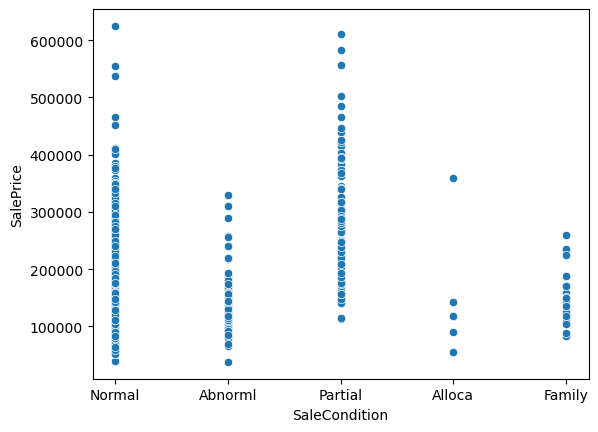

In [722]:
# drop the row with salecondition value AdjLand
df.drop(df[df['SaleCondition'] == 'AdjLand'].index, inplace = True)

# draw a scatter plot of salecondition and SalePrice
sns.scatterplot(x='SaleCondition', y='SalePrice', data=df)
plt.show()

## 4 Heatmap

c:\Users\Vishaly\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

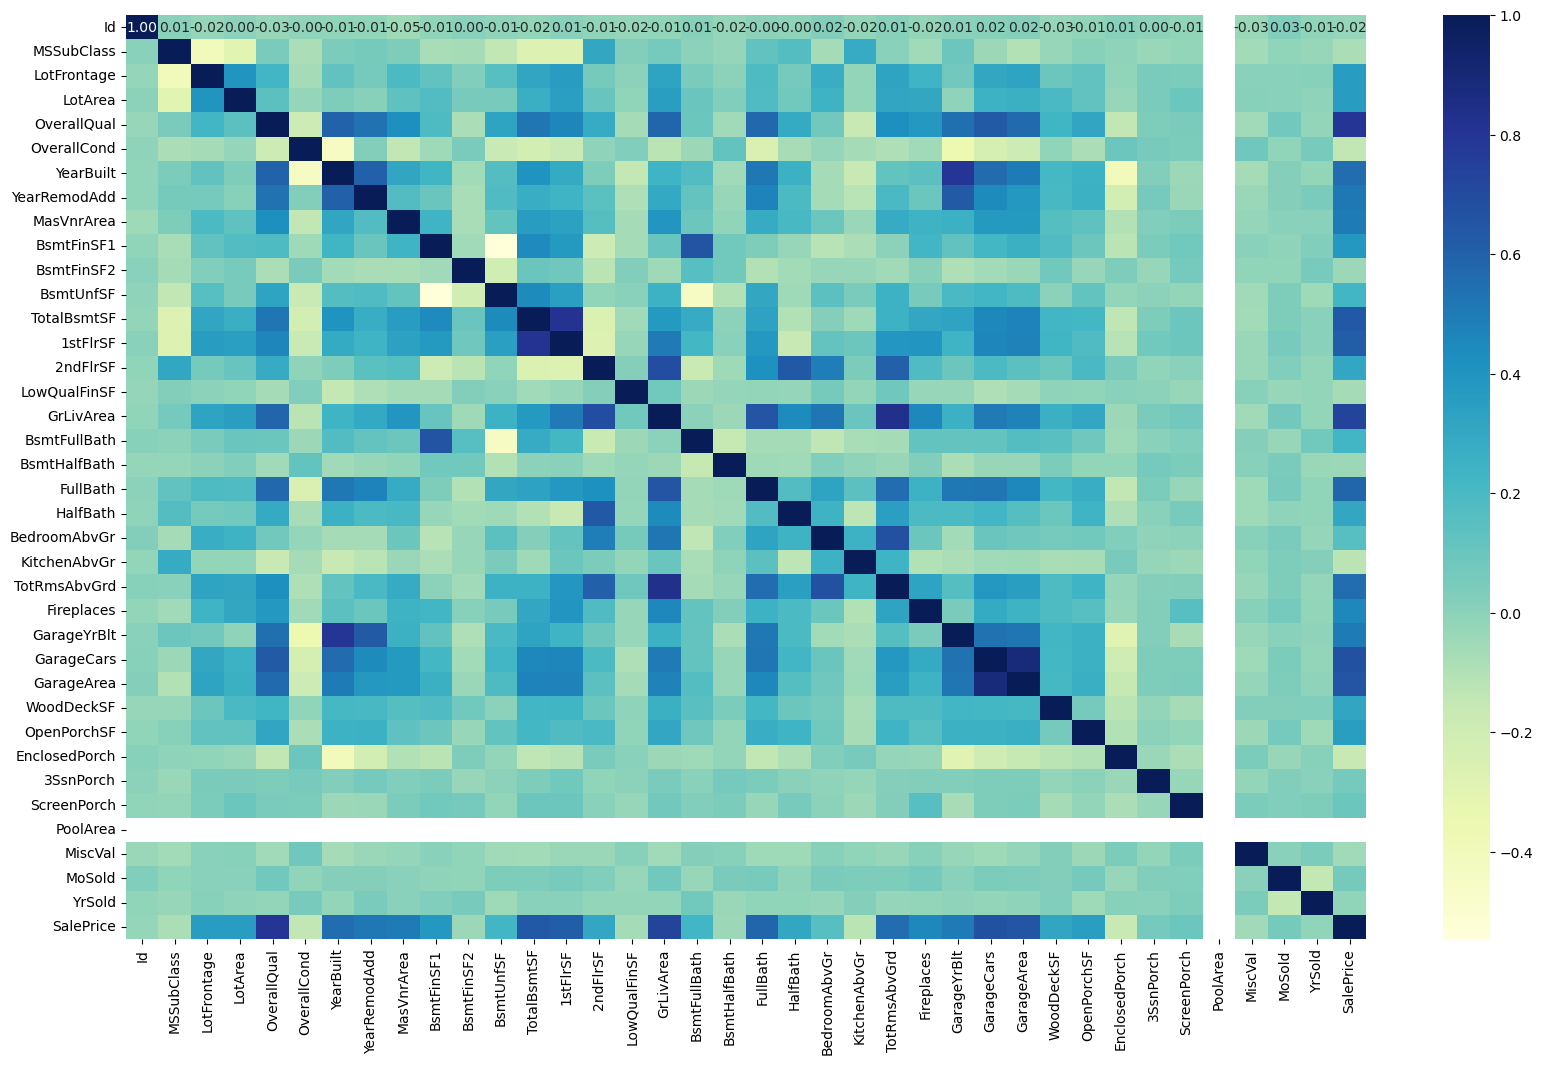

In [723]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True) # correlation matrix
plt.figure(figsize=(20, 12)) # set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu",fmt=".2f") # draw the heatmap

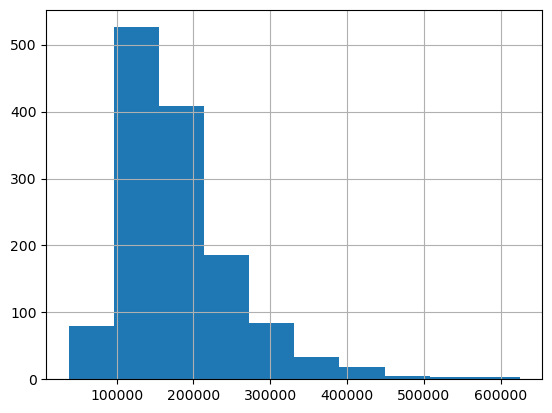

In [724]:
# draw a histogram of SalePrice
df['SalePrice'].hist()
plt.show()

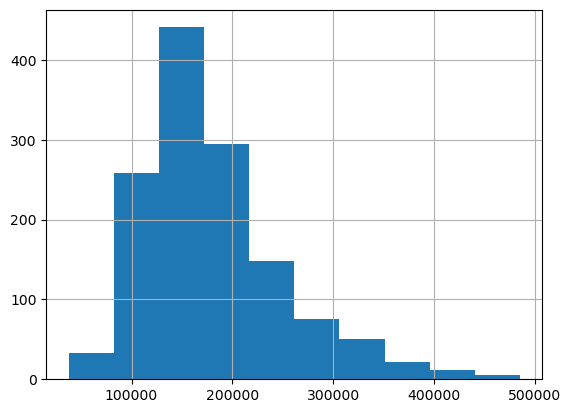

In [725]:
# drop the row with SalePrice value over 500000
df.drop(df[df['SalePrice'] > 500000].index, inplace = True)

# draw a histogram of SalePrice
df['SalePrice'].hist()
plt.show()

### 4.1 Removing irrelevant columns

In [726]:
# drop the column YrSold, BsmtHalfBath, LowQualFinSF, BsmtFinSF2
df = df.drop(['YrSold', 'BsmtHalfBath', 'LowQualFinSF', 'BsmtFinSF2'], axis=1)

In [727]:
# drop the Id column
df = df.drop(['Id'], axis=1)

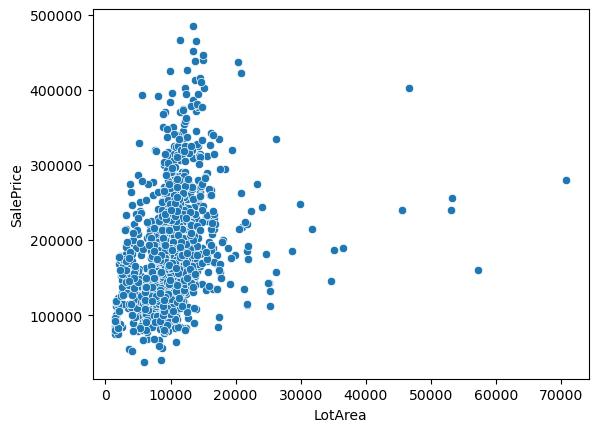

In [728]:
# draw a scatter plot
sns.scatterplot(x='LotArea', y='SalePrice', data=df) # scatter plot of LotArea and SalePrice
plt.show() 

In [729]:
# drop the column Lotshape
df = df.drop(['LotShape'], axis=1)

### 4.2 Encoding

In [730]:
# list all the unique values in each of the categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
LandContour: ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities: ['AllPub']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Somerst' 'NWAmes' 'OldTown'
 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV'
 'Timber' 'Mitchel' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']
RoofMatl: ['CompShg' 'WdShake' 'Tar&Grv' 'WdShngl']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'Stucco' 'AsbShng']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' '

In [731]:
# convert the categorical columns to numerical columns using ordinal encoding
df['MSZoning'] = df['MSZoning'].map({'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH' :4})
df['Street'] = df['Street'].map({'Pave':0, 'Grvl':1})
df['LandContour'] = df['LandContour'].map({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})
df['Utilities'] = df['Utilities'].map({'AllPub':0, 'NoSeWa':1})
df['LotConfig'] = df['LotConfig'].map({'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4})
df['LandSlope'] = df['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
df['Neighborhood'] = df['Neighborhood'].map({'CollgCr':0, 'Veenker':1, 'Crawfor':2, 'NoRidge':3, 'Mitchel':4,
       'Somerst':5, 'NWAmes':6, 'OldTown':7, 'BrkSide':8, 'Sawyer':9, 'NridgHt':10,
       'NAmes':11, 'SawyerW':12, 'IDOTRR':13, 'MeadowV':14, 'Edwards':15, 'Timber':16,
       'Gilbert':17, 'StoneBr':18, 'ClearCr':19, 'NPkVill':20, 'Blmngtn':21, 'BrDale':22,
       'SWISU':23, 'Blueste':24})
df['Condition1'] = df['Condition1'].map({'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe':4, 'PosA':5,
       'RRNn':6, 'RRAn':7, 'RRNe':8})
df['Condition2'] = df['Condition2'].map({'Norm':0, 'Artery':1, 'RRNn':2, 'Feedr':3, 'PosN':4, 'PosA':5,
       'RRAn':6, 'RRAe':7})
df['BldgType'] = df['BldgType'].map({'1Fam':0, '2fmCon':1, 'Duplex':2, 'Twnhs':3, 'TwnhsE':4})
df['HouseStyle'] = df['HouseStyle'].map({'1Story':0, '1.5Fin':1, '1.5Unf':2, '2Story':3, '2.5Fin':4, '2.5Unf':5,
       'SFoyer':6, 'SLvl':7})
df['RoofStyle'] = df['RoofStyle'].map({'Gable':0, 'Hip':1, 'Gambrel':2, 'Mansard':3, 'Flat':4, 'Shed':5})
df['RoofMatl'] = df['RoofMatl'].map({'CompShg':0, 'WdShngl':1, 'Metal':2, 'WdShake':3, 'ClyTile':4, 'Membran':5,
       'Roll':6, 'Tar&Grv':7})
df['Exterior1st'] = df['Exterior1st'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5,
       'BrkFace':6, 'WdShing':7, 'AsbShng':8, 'Stucco':9, 'BrkComm':10, 'AsphShn':11, 'Stone':12,
       'ImStucc':13})
df['Exterior2nd'] = df['Exterior2nd'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5,
       'Wd Shng':6, 'BrkFace':7, 'Stucco':8, 'AsbShng':9, 'Brk Cmn':10, 'ImStucc':11, 'AsphShn':12,
       'Stone':13, 'Other':14})
df['ExterQual'] = df['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Foundation'] = df['Foundation'].map({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Wood':3, 'Slab':4, 'Stone':5})
df['BsmtQual'] = df['BsmtQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['BsmtCond'] = df['BsmtCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['BsmtExposure'] = df['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 'Gd':3})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Electrical'] = df['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Functional'] = df['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
df['GarageType'] = df['GarageType'].map({'Detchd':0, 'CarPort':1, 'BuiltIn':2, 'Attchd':3, 'Basment':4, '2Types':5})
df['GarageFinish'] = df['GarageFinish'].map({'Unf':0, 'RFn':1, 'Fin':2})
df['GarageQual'] = df['GarageQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['GarageCond'] = df['GarageCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['PavedDrive'] = df['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
df['SaleType'] = df['SaleType'].map({'WD':0, 'CWD':1, 'VWD':2, 'New':3, 'COD':4, 'Con':5, 'ConLw':6, 'ConLI':7, 'ConLD':8, 'Oth':9})
df['SaleCondition'] = df['SaleCondition'].map({'Normal':0, 'Abnorml':1, 'AdjLand':2, 'Alloca':3, 'Family':4, 'Partial':5})
df['Heating'] = df['Heating'].map({'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4})


In [732]:
# list nurmerical columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SaleT

In [733]:
# display columns which are not numerical
df.select_dtypes('object').columns

Index([], dtype='object')

In [734]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LandContour  Utilities  \
0          60         0         65.0     8450       0            0          0   
1          20         0         80.0     9600       0            0          0   
2          60         0         68.0    11250       0            0          0   
3          70         0         60.0     9550       0            0          0   
4          60         0         84.0    14260       0            0          0   

   LotConfig  LandSlope  Neighborhood  ...  OpenPorchSF  EnclosedPorch  \
0          0          0             0  ...           61              0   
1          3          0             1  ...            0              0   
2          0          0             0  ...           42              0   
3          1          0             2  ...           35            272   
4          3          0             3  ...           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SaleType  SaleCondition  \
0          0            0         0        0       2         0              0   
1          0            0         0        0       5         0              0   
2          0            0         0        0       9         0              0   
3          0            0         0        0       2         0              1   
4          0            0         0        0      12         0              0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 68 columns]

## 5 Data Spliting

In [735]:
# Get all column names except 'SalePrice'
columns_except_saleprice = [col for col in df.columns if col!= 'SalePrice']

# Use these column names to create X
X = df[columns_except_saleprice]  # Make sure 'df' is used here instead of 'data'
y = df['SalePrice']

# shape of X and y
print(X.shape)
print(y.shape)

(1340, 67)
(1340,)


In [736]:
# training and testing split
from sklearn.model_selection import train_test_split # import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 70% training and 30% testing

### 5.1 Training the model

In [737]:
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice']


In [738]:
# fit the model with multiple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [739]:
# make predictions
y_pred = model.predict(X_test)

In [740]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 619595310.2577349
Root Mean Squared Error: 24891.67150389332
Mean Absolute Error: 18205.296416366953
R2 Score: 0.8855832398204023


### 5.2 Making Predictions for submission

In [741]:
# load the data
submission_data = pd.read_csv('data/test.csv')
submission_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

### 5.3 Missing values in test.csv

In [742]:
# drop the column YrSold, BsmtHalfBath, LowQualFinSF, BsmtFinSF2
submission_data = submission_data.drop(['YrSold', 'BsmtHalfBath', 'LowQualFinSF', 'BsmtFinSF2'], axis=1)

In [743]:
# drop the columns that were dropped to train the model
submission_data = submission_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'CentralAir', 'LotShape'], axis=1)

In [744]:
# display only the columns with missing values
submission_data.isna().sum()[submission_data.isna().sum() > 0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [745]:
# display the catergorical columns with missing values
submission_data.select_dtypes('object').isna().sum()[submission_data.select_dtypes('object').isna().sum() > 0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [746]:
# impute the missing in the categorical columns with the mode
submission_data['MSZoning'] = submission_data['MSZoning'].fillna(submission_data['MSZoning'].mode()[0])
submission_data['Utilities'] = submission_data['Utilities'].fillna(submission_data['Utilities'].mode()[0])
submission_data['Exterior1st'] = submission_data['Exterior1st'].fillna(submission_data['Exterior1st'].mode()[0])
submission_data['Exterior2nd'] = submission_data['Exterior2nd'].fillna(submission_data['Exterior2nd'].mode()[0])
submission_data['KitchenQual'] = submission_data['KitchenQual'].fillna(submission_data['KitchenQual'].mode()[0])
submission_data['BsmtQual'] = submission_data['BsmtQual'].fillna(submission_data['BsmtQual'].mode()[0])
submission_data['BsmtCond'] = submission_data['BsmtCond'].fillna(submission_data['BsmtCond'].mode()[0])
submission_data['BsmtExposure'] = submission_data['BsmtExposure'].fillna(submission_data['BsmtExposure'].mode()[0])
submission_data['BsmtFinType1'] = submission_data['BsmtFinType1'].fillna(submission_data['BsmtFinType1'].mode()[0])
submission_data['BsmtFinType2'] = submission_data['BsmtFinType2'].fillna(submission_data['BsmtFinType2'].mode()[0])
submission_data['KitchenQual'] = submission_data['KitchenQual'].fillna(submission_data['KitchenQual'].mode()[0])
submission_data['Functional'] = submission_data['Functional'].fillna(submission_data['Functional'].mode())
submission_data['GarageType'] = submission_data['GarageType'].fillna(submission_data['GarageType'].mode()[0])
submission_data['GarageFinish'] = submission_data['GarageFinish'].fillna(submission_data['GarageFinish'].mode()[0])
submission_data['GarageQual'] = submission_data['GarageQual'].fillna(submission_data['GarageQual'].mode()[0])
submission_data['GarageCond'] = submission_data['GarageCond'].fillna(submission_data['GarageCond'].mode()[0])
submission_data['SaleType'] = submission_data['SaleType'].fillna(submission_data['SaleType'].mode()[0])
submission_data['Functional'] = submission_data['Functional'].fillna(submission_data['Functional'].mode()[0])

In [747]:
# display the missing values in the categorical columns
submission_data.select_dtypes('object').isna().sum()[submission_data.select_dtypes('object').isna().sum() > 0]

Series([], dtype: int64)

In [748]:
# display the missing values in the numerical columns
submission_data.select_dtypes(['int64', 'float64']).isna().sum()[submission_data.select_dtypes(['int64', 'float64']).isna().sum() > 0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [749]:
# impute the missing in the numerical columns with the mean
submission_data['LotFrontage'] = submission_data['LotFrontage'].fillna(submission_data['LotFrontage'].mean())
submission_data['MasVnrArea'] = submission_data['MasVnrArea'].fillna(submission_data['MasVnrArea'].mean())
submission_data['BsmtFinSF1'] = submission_data['BsmtFinSF1'].fillna(submission_data['BsmtFinSF1'].mean())
submission_data['BsmtUnfSF'] = submission_data['BsmtUnfSF'].fillna(submission_data['BsmtUnfSF'].mean())
submission_data['TotalBsmtSF'] = submission_data['TotalBsmtSF'].fillna(submission_data['TotalBsmtSF'].mean())
submission_data['BsmtFullBath'] = submission_data['BsmtFullBath'].fillna(submission_data['BsmtFullBath'].mean())
submission_data['GarageYrBlt'] = submission_data['GarageYrBlt'].fillna(submission_data['GarageYrBlt'].mean())
submission_data['GarageCars'] = submission_data['GarageCars'].fillna(submission_data['GarageCars'].mean())
submission_data['GarageArea'] = submission_data['GarageArea'].fillna(submission_data['GarageArea'].mean())

In [750]:
# show the number of missing values in each column
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Series([], dtype: int64)

### 5.4 Unique values

In [751]:
# show all the columns with unique values
submission_data.nunique()

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       116
LotArea          1106
                 ... 
PoolArea            7
MiscVal            26
MoSold             12
SaleType            9
SaleCondition       6
Length: 68, dtype: int64

In [752]:
# drop the row with LotFrontage value over 300
df.drop(df[df['LotFrontage'] > 300].index, inplace = True)

In [753]:
# drop the row with LotArea value over 100000
df.drop(df[df['LotArea'] > 100000].index, inplace = True)

In [754]:
# drop the row with Utilities value NoSeWa
df.drop(df[df['Utilities'] == 'NoSeWa'].index, inplace = True)

In [755]:
# drop the row in Neighborhood called Blueste
df.drop(df[df['Neighborhood'] == 'Blueste'].index, inplace = True)

In [756]:
# drop the row in Condtional2 called PosA, RRAn and RRAe
df.drop(df[df['Condition2'] == 'PosA'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAn'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAe'].index, inplace = True)

In [757]:
# drop the row with OverallQual value 1 and 2
df.drop(df[df['OverallQual'] == 1].index, inplace = True)
df.drop(df[df['OverallQual'] == 2].index, inplace = True)

In [758]:
# drop the row with OverallCond value 2
df.drop(df[df['OverallCond'] == 2].index, inplace = True)

In [759]:
# drop the row with RoofStyle called Shed
df.drop(df[df['RoofStyle'] == 'Shed'].index, inplace = True)


In [760]:
# drop the row with Exterior1st called BrkComm, Stone, AsphShn, ImStucc and CBlock
df.drop(df[df['Exterior1st'] == 'BrkComm'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'Stone'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'AsphShn'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'ImStucc'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'CBlock'].index, inplace = True)

In [761]:
# drop the row with Exterior2nd called Brk Cmn, Stone, AsphShn and Other
df.drop(df[df['Exterior2nd'] == 'Brk Cmn'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'Stone'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'AsphShn'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'Other'].index, inplace = True)

In [762]:
# drop the rows with MasVnrArea value over 1500
df.drop(df[df['MasVnrArea'] > 1500].index, inplace = True)

In [763]:
# drop the row with ExterCond called Ex
df.drop(df[df['ExterCond'] == 'Ex'].index, inplace = True)

In [764]:
# drop the row with Foundation called Wood
df.drop(df[df['Foundation'] == 'Wood'].index, inplace = True)

In [765]:
# drop the row with Heating called Floor, Wall and OthW
df.drop(df[df['Heating'] == 'Floor'].index, inplace = True)
df.drop(df[df['Heating'] == 'Wall'].index, inplace = True)
df.drop(df[df['Heating'] == 'OthW'].index, inplace = True)

In [766]:
# drop the rows with HeatingQC value Po
df.drop(df[df['HeatingQC'] == 'Po'].index, inplace = True)

In [767]:
# drop the row with Electrical value FuseP
df.drop(df[df['Electrical'] == 'FuseP'].index, inplace = True)

In [768]:
# drop the row with 1stFlrSF value over 3000
df.drop(df[df['1stFlrSF'] > 3000].index, inplace = True)

In [769]:
# drop the row with GrLivArea value over 4000
df.drop(df[df['GrLivArea'] > 4000].index, inplace = True)

In [770]:
# drop the row with BsmtFullBath value 3
df.drop(df[df['BsmtFullBath'] == 3].index, inplace = True)

In [771]:
# drop the values in FUllBath 0
df.drop(df[df['FullBath'] == 0].index, inplace = True)

In [772]:
# drop the values in HalfBath 2
df.drop(df[df['HalfBath'] == 2].index, inplace = True)

In [773]:
# drop the row with TotRmsAbvGrd value over 13
df.drop(df[df['TotRmsAbvGrd'] > 13].index, inplace = True)

In [774]:
# drop the row with Functional value Sev
df.drop(df[df['Functional'] == 'Sev'].index, inplace = True)

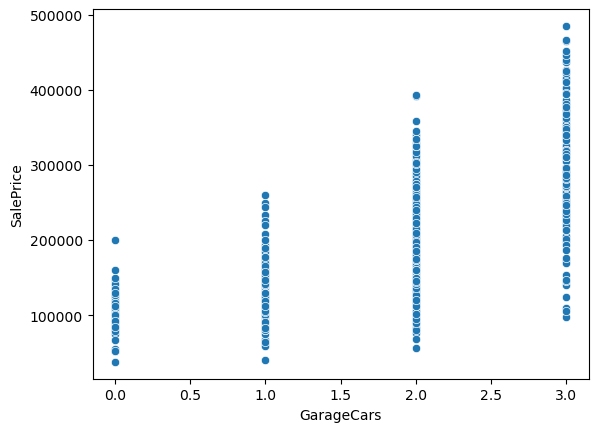

In [775]:
# scatter plot of GarageCars and SalePrice
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)
plt.show()

In [776]:
# drop the row with GarageArea value over 1200
df.drop(df[df['GarageArea'] > 1200].index, inplace = True)

In [777]:
# drop the row with GarageQual value Ex and Po
df.drop(df[df['GarageQual'] == 'Ex'].index, inplace = True)
df.drop(df[df['GarageQual'] == 'Po'].index, inplace = True)

In [778]:
# drop the row with GarageCond value Po
df.drop(df[df['GarageCond'] == 'Po'].index, inplace = True)

In [779]:
# drop the row with WoodDeckSF value over 800
df.drop(df[df['WoodDeckSF'] > 800].index, inplace = True)

In [780]:
# drop the row with OpenPorchSF value over 400
df.drop(df[df['OpenPorchSF'] > 400].index, inplace = True)

In [781]:
# drop the row with EnclosedPorch value over 500
df.drop(df[df['EnclosedPorch'] > 500].index, inplace = True)

In [782]:
# drop the row with 3SsnPorch value over 350
df.drop(df[df['3SsnPorch'] > 350].index, inplace = True)

In [783]:
# drop the row with PoolArea value over 400
df.drop(df[df['PoolArea'] > 400].index, inplace = True)

In [784]:
# drop the row with MiscVal value over 2000
df.drop(df[df['MiscVal'] > 2000].index, inplace = True)

In [785]:
# drop the row with salecondition value AdjLand
df.drop(df[df['SaleCondition'] == 'AdjLand'].index, inplace = True)

### 5.5 Encoding in test.csv

In [786]:
# convert the categorical columns to numerical columns using ordinal encoding
submission_data['MSZoning'] = submission_data['MSZoning'].map({'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH':4})
submission_data['Street'] = submission_data['Street'].map({'Pave':0, 'Grvl':1})
submission_data['LandContour'] = submission_data['LandContour'].map({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})
submission_data['Utilities'] = submission_data['Utilities'].map({'AllPub':0, 'NoSeWa':1})
submission_data['LotConfig'] = submission_data['LotConfig'].map({'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4})
submission_data['LandSlope'] = submission_data['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
submission_data['Neighborhood'] = submission_data['Neighborhood'].map({'CollgCr':0, 'Veenker':1, 'Crawfor':2, 'NoRidge':3, 'Mitchel':4,
       'Somerst':5, 'NWAmes':6, 'OldTown':7, 'BrkSide':8, 'Sawyer':9, 'NridgHt':10,
       'NAmes':11, 'SawyerW':12, 'IDOTRR':13, 'MeadowV':14, 'Edwards':15, 'Timber':16,
       'Gilbert':17, 'StoneBr':18, 'ClearCr':19, 'NPkVill':20, 'Blmngtn':21, 'BrDale':22,
       'SWISU':23, 'Blueste':24})
submission_data['Condition1'] = submission_data['Condition1'].map({'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe':4, 'PosA':5,
       'RRNn':6, 'RRAn':7, 'RRNe':8})
submission_data['Condition2'] = submission_data['Condition2'].map({'Norm':0, 'Artery':1, 'RRNn':2, 'Feedr':3, 'PosN':4, 'PosA':5,
       'RRAn':6, 'RRAe':7})
submission_data['BldgType'] = submission_data['BldgType'].map({'1Fam':0, '2fmCon':1, 'Duplex':2, 'Twnhs':3, 'TwnhsE':4})
submission_data['HouseStyle'] = submission_data['HouseStyle'].map({'1Story':0, '1.5Fin':1, '1.5Unf':2, '2Story':3, '2.5Fin':4, '2.5Unf':5,
       'SFoyer':6, 'SLvl':7})
submission_data['RoofStyle'] = submission_data['RoofStyle'].map({'Gable':0, 'Hip':1, 'Gambrel':2, 'Mansard':3, 'Flat':4, 'Shed':5})
submission_data['RoofMatl'] = submission_data['RoofMatl'].map({'CompShg':0, 'WdShngl':1, 'Metal':2, 'WdShake':3, 'ClyTile':4, 'Membran':5,
       'Roll':6, 'Tar&Grv':7})
submission_data['Exterior1st'] = submission_data['Exterior1st'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5,
       'BrkFace':6, 'WdShing':7, 'AsbShng':8, 'Stucco':9, 'BrkComm':10, 'AsphShn':11, 'Stone':12,
       'ImStucc':13})
submission_data['Exterior2nd'] = submission_data['Exterior2nd'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5,
       'Wd Shng':6, 'BrkFace':7, 'Stucco':8, 'AsbShng':9, 'Brk Cmn':10, 'ImStucc':11, 'AsphShn':12,
       'Stone':13, 'Other':14})
submission_data['ExterQual'] = submission_data['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['ExterCond'] = submission_data['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['Foundation'] = submission_data['Foundation'].map({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Wood':3, 'Slab':4, 'Stone':5})
submission_data['BsmtQual'] = submission_data['BsmtQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['BsmtCond'] = submission_data['BsmtCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['BsmtExposure'] = submission_data['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 'Gd':3})
submission_data['BsmtFinType1'] = submission_data['BsmtFinType1'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
submission_data['BsmtFinType2'] = submission_data['BsmtFinType2'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
submission_data['HeatingQC'] = submission_data['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['Electrical'] = submission_data['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4})
submission_data['KitchenQual'] = submission_data['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['Functional'] = submission_data['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
submission_data['GarageType'] = submission_data['GarageType'].map({'Detchd':0, 'CarPort':1, 'BuiltIn':2, 'Attchd':3, 'Basment':4, '2Types':5})
submission_data['GarageFinish'] = submission_data['GarageFinish'].map({'Unf':0, 'RFn':1, 'Fin':2})
submission_data['GarageQual'] = submission_data['GarageQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['GarageCond'] = submission_data['GarageCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['PavedDrive'] = submission_data['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
submission_data['SaleType'] = submission_data['SaleType'].map({'WD':0, 'CWD':1, 'VWD':2, 'New':3, 'COD':4, 'Con':5, 'ConLw':6, 'ConLI':7, 'ConLD':8, 'Oth':9})
submission_data['SaleCondition'] = submission_data['SaleCondition'].map({'Normal':0, 'Abnorml':1, 'AdjLand':2, 'Alloca':3, 'Family':4, 'Partial':5})
submission_data['Heating'] = submission_data['Heating'].map({'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4})


In [787]:
# show the records with nan values
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Exterior1st    1
Exterior2nd    2
dtype: int64

In [788]:
# impute the missing values in Exterior1st and Exterior2nd with the mode
submission_data['Exterior1st'] = submission_data['Exterior1st'].fillna(submission_data['Exterior1st'].mode()[0])
submission_data['Exterior2nd'] = submission_data['Exterior2nd'].fillna(submission_data['Exterior2nd'].mode()[0])
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Series([], dtype: int64)

## Making submission

In [789]:
# make a new variable X_submission
X_submission = submission_data.drop(['Id'], axis=1)
X_submission

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LandContour  \
0             20         4         80.0    11622       0            0   
1             20         0         81.0    14267       0            0   
2             60         0         74.0    13830       0            0   
3             60         0         78.0     9978       0            0   
4            120         0         43.0     5005       0            2   
...          ...       ...          ...      ...     ...          ...   
1454         160         1         21.0     1936       0            0   
1455         160         1         21.0     1894       0            0   
1456          20         0        160.0    20000       0            0   
1457          85         0         62.0    10441       0            0   
1458          60         0         74.0     9627       0            0   

      Utilities  LotConfig  LandSlope  Neighborhood  ...  WoodDeckSF  \
0             0          0          0            11  ...         140   
1             0          1          0            11  ...         393   
2             0          0          0            17  ...         212   
3             0          0          0            17  ...         360   
4             0          0          0            18  ...           0   
...         ...        ...        ...           ...  ...         ...   
1454          0          0          0            14  ...           0   
1455          0          0          0            14  ...           0   
1456          0          0          0             4  ...         474   
1457          0          0          0             4  ...          80   
1458          0          0          1             4  ...         190   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0               0              0          0          120         0        0   
1              36              0          0            0         0    12500   
2              34              0          0            0         0        0   
3              36              0          0            0         0        0   
4              82              0          0          144         0        0   
...           ...            ...        ...          ...       ...      ...   
1454            0              0          0            0         0        0   
1455           24              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           32              0          0            0         0      700   
1458           48              0          0            0         0        0   

      MoSold  SaleType  SaleCondition  
0          6         0              0  
1          6         0              0  
2          3         0              0  
3          6         0              0  
4          1         0              0  
...      ...       ...            ...  
1454       6         0              0  
1455       4         0              1  
1456       9         0              1  
1457       7         0              0  
1458      11         0              0  

[1459 rows x 67 columns]

In [790]:
# make a new variable X_submission
X_submission = submission_data.drop(['Id'], axis=1)
X_submission

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LandContour  \
0             20         4         80.0    11622       0            0   
1             20         0         81.0    14267       0            0   
2             60         0         74.0    13830       0            0   
3             60         0         78.0     9978       0            0   
4            120         0         43.0     5005       0            2   
...          ...       ...          ...      ...     ...          ...   
1454         160         1         21.0     1936       0            0   
1455         160         1         21.0     1894       0            0   
1456          20         0        160.0    20000       0            0   
1457          85         0         62.0    10441       0            0   
1458          60         0         74.0     9627       0            0   

      Utilities  LotConfig  LandSlope  Neighborhood  ...  WoodDeckSF  \
0             0          0          0            11  ...         140   
1             0          1          0            11  ...         393   
2             0          0          0            17  ...         212   
3             0          0          0            17  ...         360   
4             0          0          0            18  ...           0   
...         ...        ...        ...           ...  ...         ...   
1454          0          0          0            14  ...           0   
1455          0          0          0            14  ...           0   
1456          0          0          0             4  ...         474   
1457          0          0          0             4  ...          80   
1458          0          0          1             4  ...         190   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0               0              0          0          120         0        0   
1              36              0          0            0         0    12500   
2              34              0          0            0         0        0   
3              36              0          0            0         0        0   
4              82              0          0          144         0        0   
...           ...            ...        ...          ...       ...      ...   
1454            0              0          0            0         0        0   
1455           24              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           32              0          0            0         0      700   
1458           48              0          0            0         0        0   

      MoSold  SaleType  SaleCondition  
0          6         0              0  
1          6         0              0  
2          3         0              0  
3          6         0              0  
4          1         0              0  
...      ...       ...            ...  
1454       6         0              0  
1455       4         0              1  
1456       9         0              1  
1457       7         0              0  
1458      11         0              0  

[1459 rows x 67 columns]

In [791]:
# make predictions
Submission_y_pred = model.predict(X_submission)
Submission_y_pred

array([130346.65308514, 141834.67347655, 176358.90378783, ...,
       186139.81939272, 114307.30615306, 229266.35091014])

In [792]:
# create a DataFrame with the Id and SalePrice
submission = pd.DataFrame({'Id': submission_data['Id'], 'SalePrice': Submission_y_pred})
submission.head()

Id      SalePrice
0  1461  130346.653085
1  1462  141834.673477
2  1463  176358.903788
3  1464  184243.096735
4  1465  182073.871562

In [793]:
# save the DataFrame to a CSV file
submission.to_csv('submission4.csv', index=False)